In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfl = pd.read_csv('dfl.csv', index_col=0)

In [3]:
dfl

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,prop_elec,prop_gaz
0,Hotel,1927,0.693147,2.564949,11.390012,0.000000,11.390012,15.793246,5.521381,0.562802,0.218666
1,Hotel,1926,0.693147,2.397895,11.023861,0.000000,11.023861,15.731637,5.657494,0.472844,0.333217
2,Other,1999,0.693147,1.098612,11.485431,10.524037,11.394480,16.307609,5.709798,0.476162,0.329387
3,Hotel,1926,0.693147,2.484907,11.326692,0.000000,11.306541,15.566239,5.171279,0.397541,0.413327
4,Other,1926,0.693147,2.197225,11.540161,0.000000,11.540161,15.655764,5.400468,0.644076,0.091461
...,...,...,...,...,...,...,...,...,...,...,...
1463,Restaurant,1902,0.693147,1.098612,10.604603,0.000000,10.107000,15.154896,4.779208,0.388845,0.421813
1464,Other,1966,0.693147,1.098612,10.414273,0.000000,10.414273,13.403040,3.125883,0.340297,0.466645
1465,Other,1922,0.693147,0.693147,10.045421,0.000000,10.045421,15.272214,4.921658,0.377125,0.433024
1466,Other,2008,0.693147,1.098612,10.047501,0.000000,10.047501,14.933481,4.555980,0.389668,0.421016


# Sommaire <a class='anchor' id="S"></a>


## [IV, Mise en place d'un modèle](#IV)
### [A, Préparation des données](#IVA)
### [B, Modèle de prédiction de la variable GHGE](#IVB)
#### [1, Mise en place et essai du modèle](#IVB1)
#### [2, Détermination des coefficients](#IVB2)
#### [3, Liste réduite](#IVB3)
### [C, Modèle de prédiction de la variable Energie site](#IVC)
#### [1, Mise en place et essai du modèle](#IVC1)
#### [2, Détermination des coefficients](#IVC2)
#### [3, Liste réduite](#IVC3)
## [V, Pertinence de la variable Energie star score](#V)
### [A, préparation des données](#VA)
### [B, Essai sur df avec na supprimé pour GHGE](#VB)
### [C, Essai sur df avec na supprimé pour énergie](#VC)
### [D, Essai sur df avec simple imputer pour GHGE](#VD)
### [E, Essai sur df avec simple imputer pour énergie](#VE)

##### [fin de page](#f)

# IV, Mise en place d'un modèle <a class='anchor' id='IV'></a>

## A, Préparation des données <a class='anchor' id='IVA'></a>

In [4]:
dfx = dfl.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
ye = dfl['SiteEnergyUse(kBtu)']
yg = dfl.TotalGHGEmissions

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### Standardisation des données

In [6]:
dfxx = dfx.drop(['PrimaryPropertyType'], axis=1)
normalise = StandardScaler()
X_scaled = normalise.fit_transform(dfxx)
dfxx = pd.DataFrame(X_scaled, columns=dfxx.columns)

#### Labellisation de la variable PrimaryPropertyType

In [7]:
ohe = OneHotEncoder()
X = ohe.fit_transform(dfx.PrimaryPropertyType.values.reshape(-1,1)).toarray()
dfohe = pd.DataFrame(X, columns=[i for i in dfl.PrimaryPropertyType.unique()])

In [8]:
dfx = dfohe.merge(dfxx, how='left', left_index=True, right_index=True)

In [9]:
X = dfx.values

In [10]:
from sklearn import model_selection, metrics

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, yg, test_size=0.3)

##### [sommaire](#S)

## B, Modèle de prédiction de la variable GHGE <a class='anchor' id='IVB'></a>

### 1, Mise en place et essai du modèle <a class='anchor' id='IVB1'></a>

elastic_net
param_alpha
Meilleur valeur [0.001]


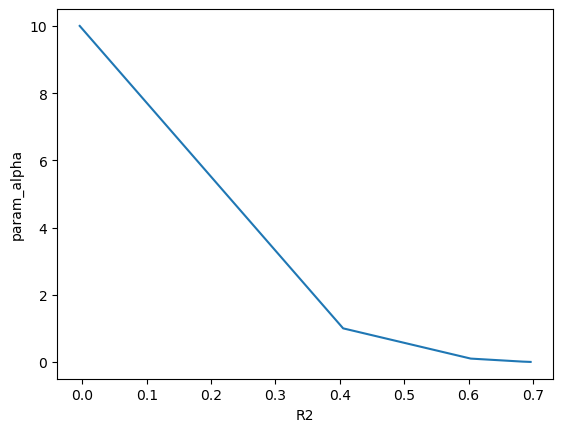

elastic_net
param_l1_ratio
Meilleur valeur [0.55]


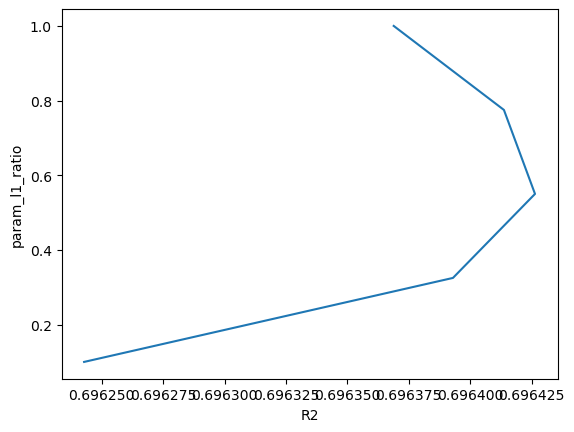

SVR
param_C
Meilleur valeur [3.]


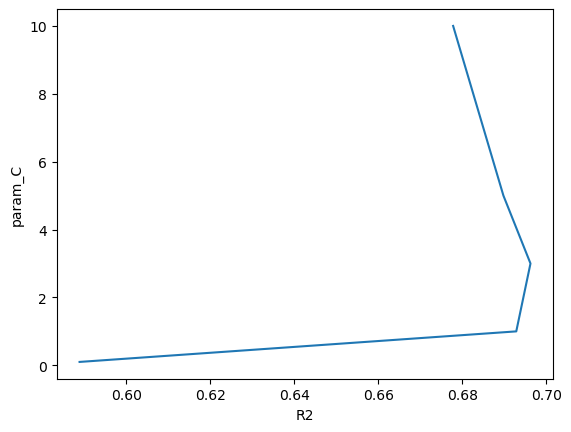

SVR
param_gamma
Meilleur valeur [0.1]


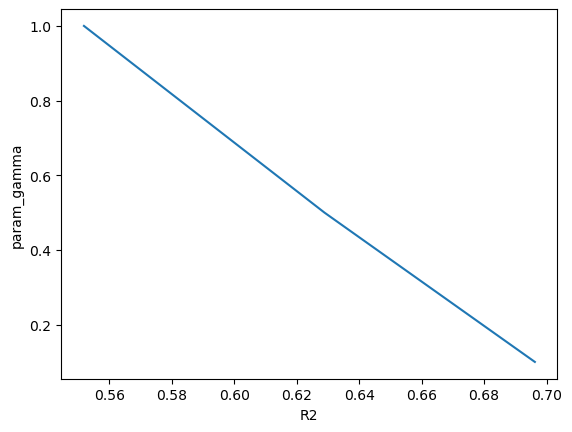

knn_regressor
param_n_neighbors
Meilleur valeur [12.]


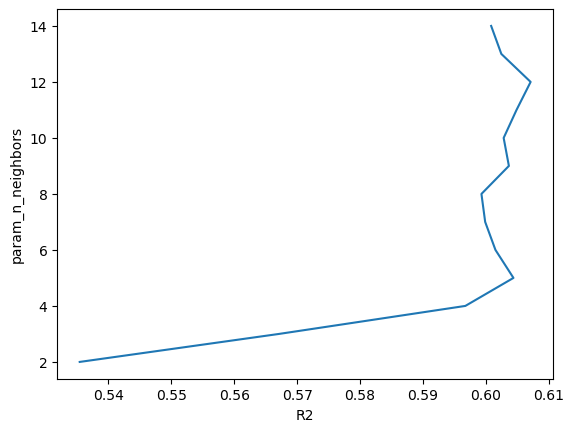

random_forest
param_min_samples_split
Meilleur valeur [20.]


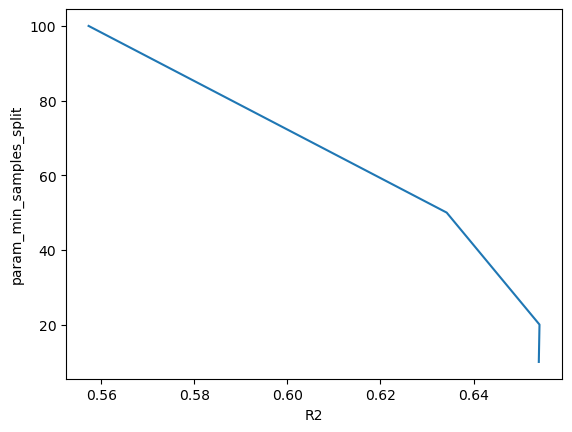

random_forest
param_n_estimators
Meilleur valeur [1000.]


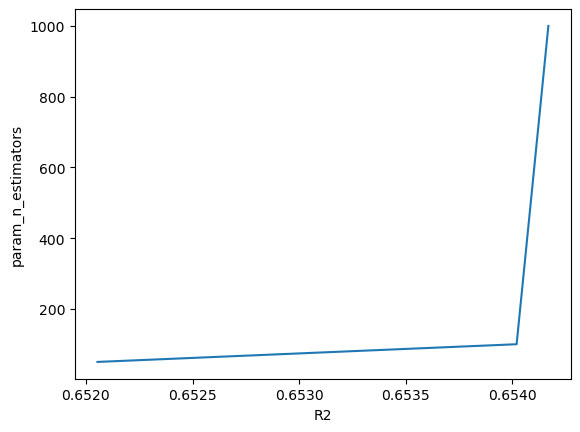

gradient_boost
param_n_estimators
Meilleur valeur [100.]


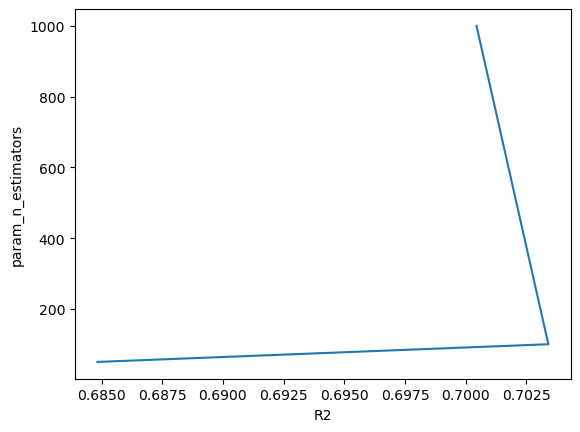

gradient_boost
param_loss
Meileur valeur ['ls']


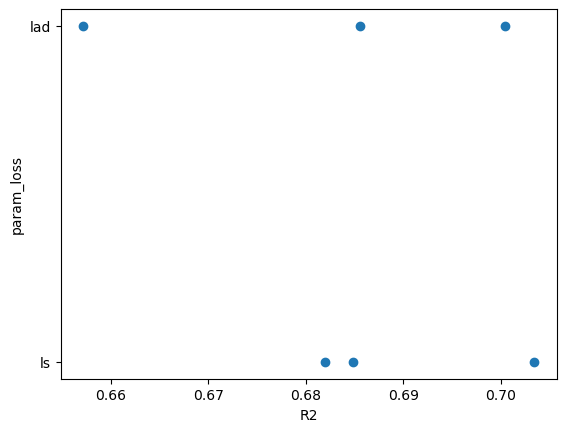

In [12]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'n_estimators' : [50,100,1000],
            'loss' : ['ls', 'lad'],
        } 
    }
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [13]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,-4.512309e+22,{},0.705943,0.375393,0.184435,0.001000
1,elastic_net,6.964264e-01,"{'alpha': 0.001, 'l1_ratio': 0.55}",0.704390,0.384879,0.184933,0.004968
2,SVR,6.962448e-01,"{'C': 3, 'gamma': 0.1}",0.711183,0.344540,0.181743,0.059918
3,knn_regressor,6.070910e-01,{'n_neighbors': 12},0.818261,0.449705,0.220056,0.000000
4,random_forest,6.541690e-01,"{'min_samples_split': 20, 'n_estimators': 1000}",0.714782,0.427087,0.191157,2.871004
5,gradient_boost,7.034064e-01,"{'loss': 'ls', 'n_estimators': 100}",0.680427,0.347664,0.174683,0.120913


In [14]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,6.962448e-01,0.012611,NaN,NaN,3.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,6.964264e-01,0.000394,0.001,0.55,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,7.034064e-01,0.000600,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,6.070910e-01,0.003400,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
linear_regression,linear_regression,-4.512309e+22,0.000400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,6.541690e-01,0.068394,NaN,NaN,NaN,NaN,NaN,20.0,1000.0,NaN


##### [sommaire](#S)

### 2, Détermination des coefficients <a class='anchor' id='IVB2'></a>

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [16]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,1.000000e+00,0.321840,0.302110,0.014232,0.017794,1.655975
Other,1.000000e+00,0.526027,0.453400,0.000030,0.000000,1.979456
Mixed Use Property,1.000000e+00,0.536485,0.511309,0.001442,0.000000,2.049236
K-12 School,1.000000e+00,0.362974,0.350465,0.005017,0.008578,1.727034
University,1.000000e+00,0.881465,0.972344,0.005909,0.009704,2.869421
Small- and Mid-Sized Office,1.000000e+00,0.536669,0.540368,0.005766,0.000656,2.083460
Self-Storage Facility,1.000000e+00,0.592434,0.619615,0.000688,0.000266,2.213003
Large Office,1.000000e+00,0.526027,0.510229,0.006115,0.003221,2.045592
Senior Care Community,1.000000e+00,0.511105,0.477403,0.000000,0.000000,1.988509
Medical Office,1.000000e+00,0.640313,0.604242,0.060996,0.055327,2.360878


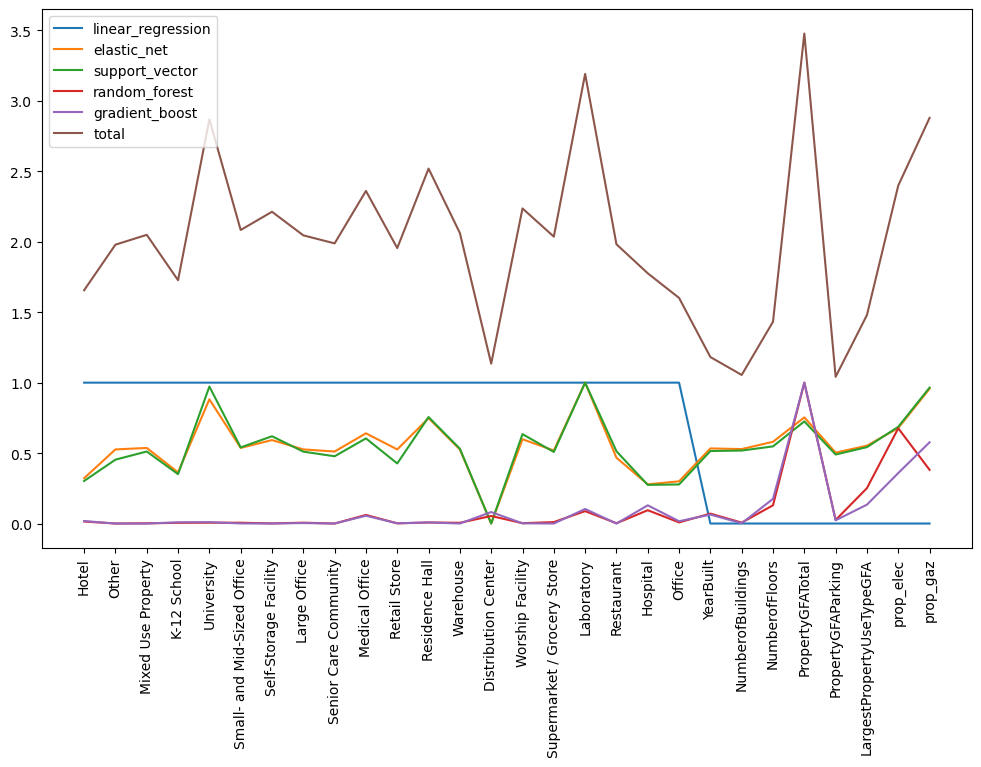

In [17]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

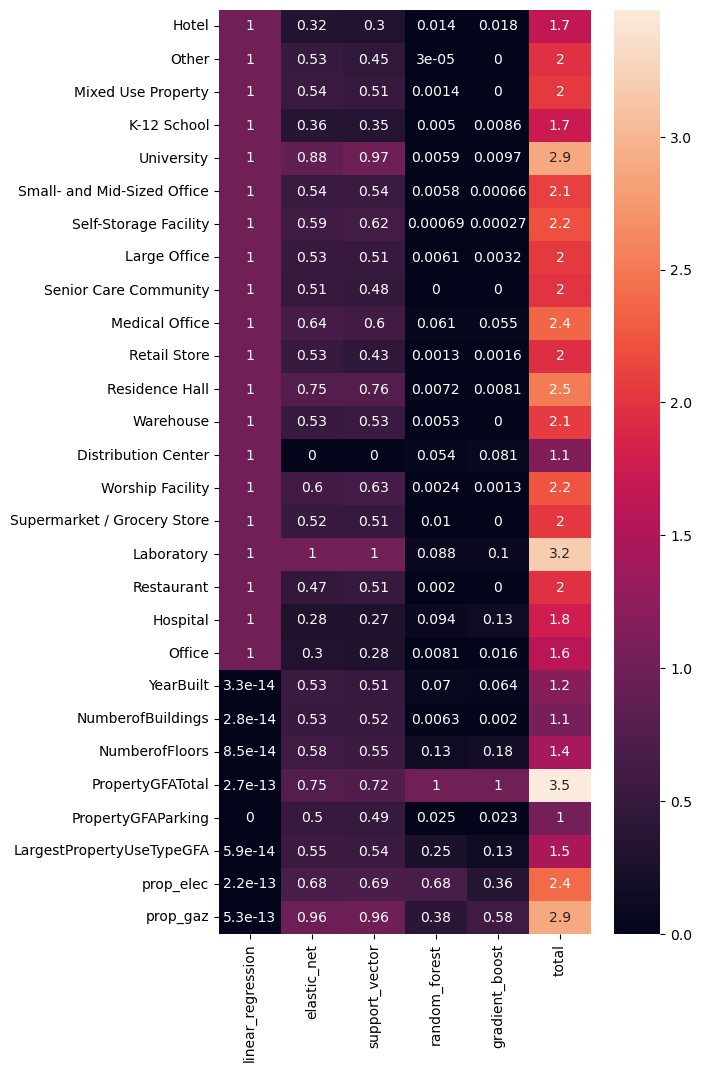

In [18]:
plt.figure(figsize=(6,12))
sns.heatmap(coefs_n, annot=True)
plt.show()

In [19]:
y_pred = xb.predict(X_test)
df_lr = pd.DataFrame(y_test)
df_y = y_pred
lrg = LinearRegression()
lrg.fit(df_lr, df_y)

LinearRegression()

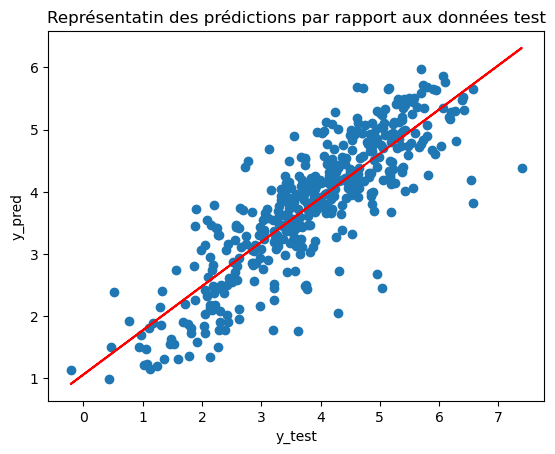

In [20]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, lrg.predict(df_lr), color='red')
plt.title('Représentation des prédictions par rapport aux données test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##### [sommaire](#S)

### 3, Liste réduite <a class='anchor' id='IVB3'></a>

In [21]:
liste = coefs_n[coefs_n.total > 2].index
df_reduit = dfx.loc[:, liste]
df_reduit.columns

Index(['Mixed Use Property', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Large Office', 'Medical Office',
       'Residence Hall', 'Warehouse', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory', 'PropertyGFATotal',
       'prop_elec', 'prop_gaz'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_reduit.values, yg, test_size=0.3)

In [23]:
dfx.shape

(1468, 28)

In [24]:
df_reduit.shape

(1468, 14)

elastic_net
param_alpha
Meilleur valeur [0.001]


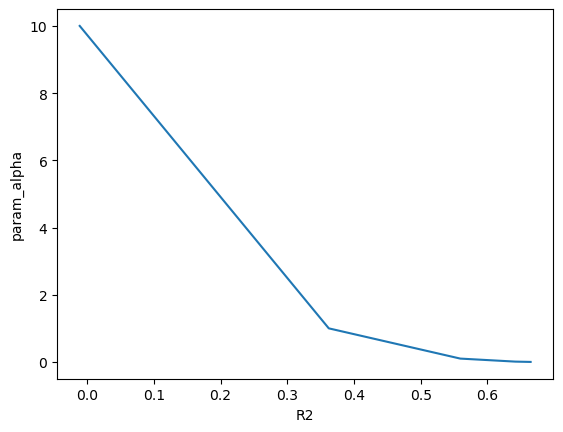

elastic_net
param_l1_ratio
Meilleur valeur [0.1]


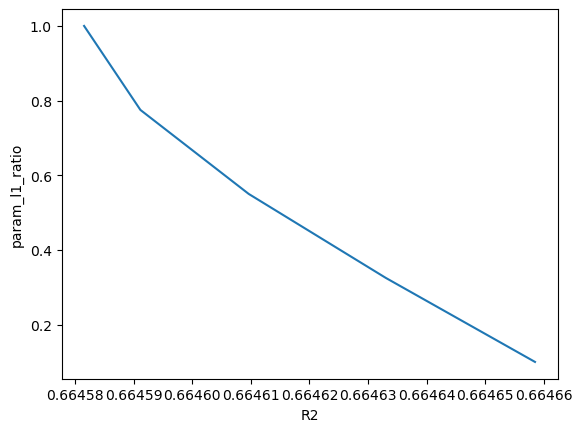

SVR
param_C
Meilleur valeur [10.]


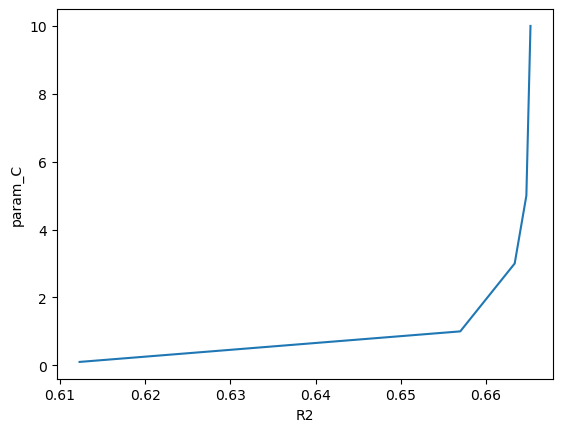

SVR
param_gamma
Meilleur valeur [0.1]


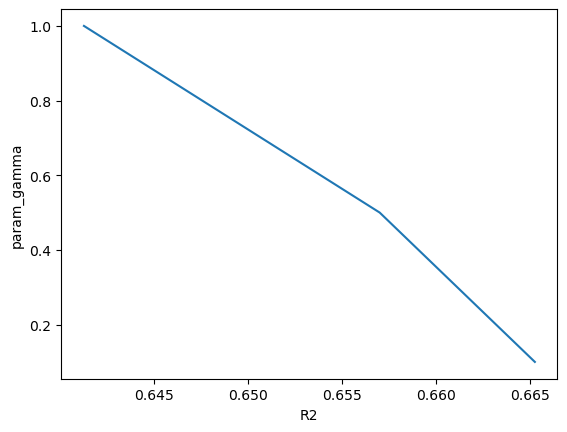

knn_regressor
param_n_neighbors
Meilleur valeur [11.]


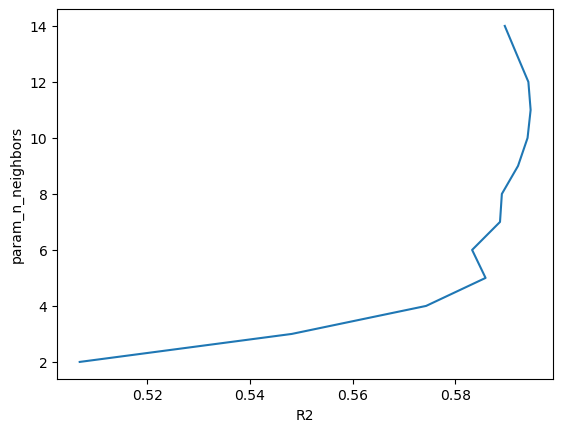

random_forest
param_min_samples_split
Meilleur valeur [20.]


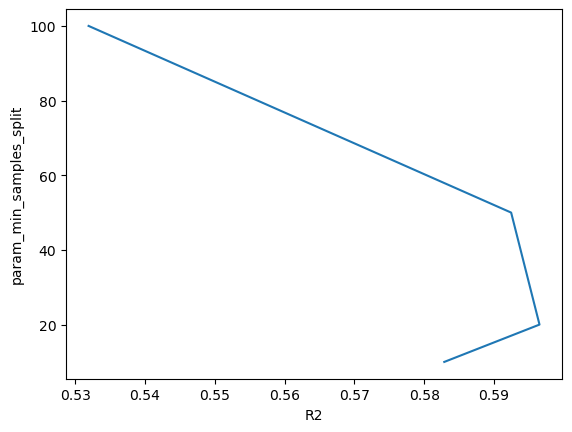

random_forest
param_n_estimators
Meilleur valeur [1000.]


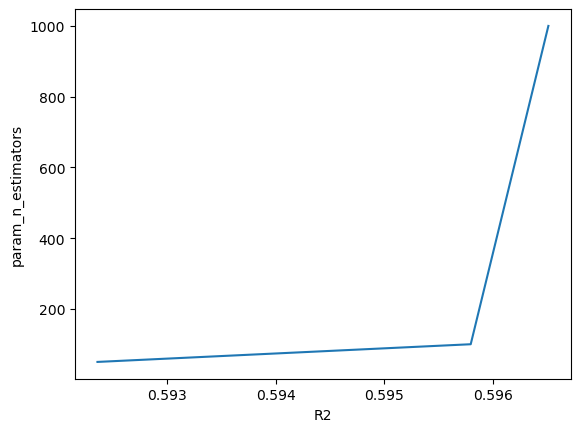

gradient_boost
param_n_estimators
Meilleur valeur [100.]


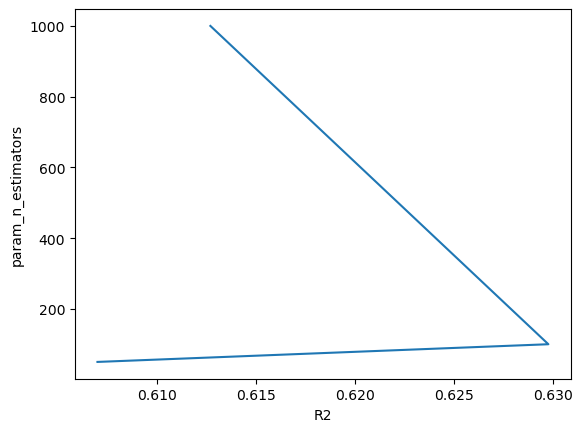

gradient_boost
param_loss
Meileur valeur ['ls']


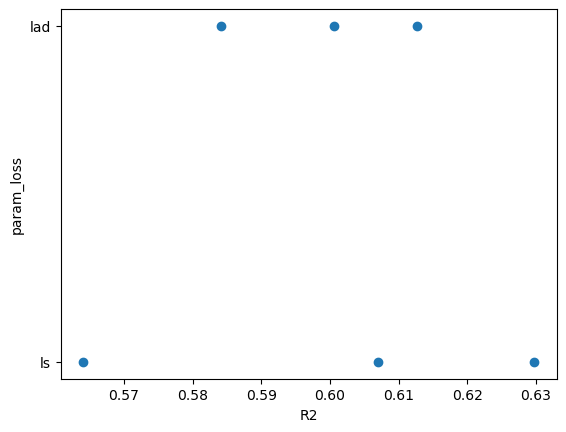

In [25]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [26]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,0.665454,{},0.714452,0.386406,0.251000,0.000000
1,elastic_net,0.664659,"{'alpha': 0.001, 'l1_ratio': 0.1}",0.713877,0.384865,0.252756,0.003000
2,SVR,0.665251,"{'C': 10, 'gamma': 0.1}",0.706415,0.355114,0.235123,0.058043
3,knn_regressor,0.594641,{'n_neighbors': 11},0.776593,0.454733,0.260202,0.000000
4,random_forest,0.596509,"{'min_samples_split': 20, 'n_estimators': 1000}",0.740270,0.443213,0.257161,2.178005
5,gradient_boost,0.629743,"{'loss': 'ls', 'n_estimators': 100}",0.715584,0.396691,0.250018,0.077999


In [27]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,0.665251,0.013497,NaN,NaN,10.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,0.664659,0.001200,0.001,0.1,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,0.629743,0.000799,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,0.594641,0.001800,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN
linear_regression,linear_regression,0.665454,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,0.596509,0.068830,NaN,NaN,NaN,NaN,NaN,20.0,1000.0,NaN


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in df_reduit.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in df_reduit.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in df_reduit.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in df_reduit.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in df_reduit.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [29]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Mixed Use Property,0.319444,0.322972,0.130863,0.004060,0.009277,0.786616
University,0.976711,0.790525,0.964503,0.006825,0.009980,2.748543
Small- and Mid-Sized Office,0.277126,0.282637,0.105024,0.015943,0.013099,0.693829
Self-Storage Facility,0.417927,0.407876,0.290538,0.005231,0.004103,1.125674
Large Office,0.209037,0.217038,0.035045,0.012389,0.007542,0.481050
Medical Office,0.371083,0.388817,0.214758,0.077266,0.079380,1.131305
Residence Hall,0.696011,0.644123,0.578057,0.009306,0.011993,1.939490
Warehouse,0.163039,0.168791,0.052878,0.000000,0.000000,0.384707
Worship Facility,0.248430,0.229766,0.289939,0.000202,0.001395,0.769732
Supermarket / Grocery Store,0.192046,0.201588,0.063800,0.034444,0.027305,0.519183


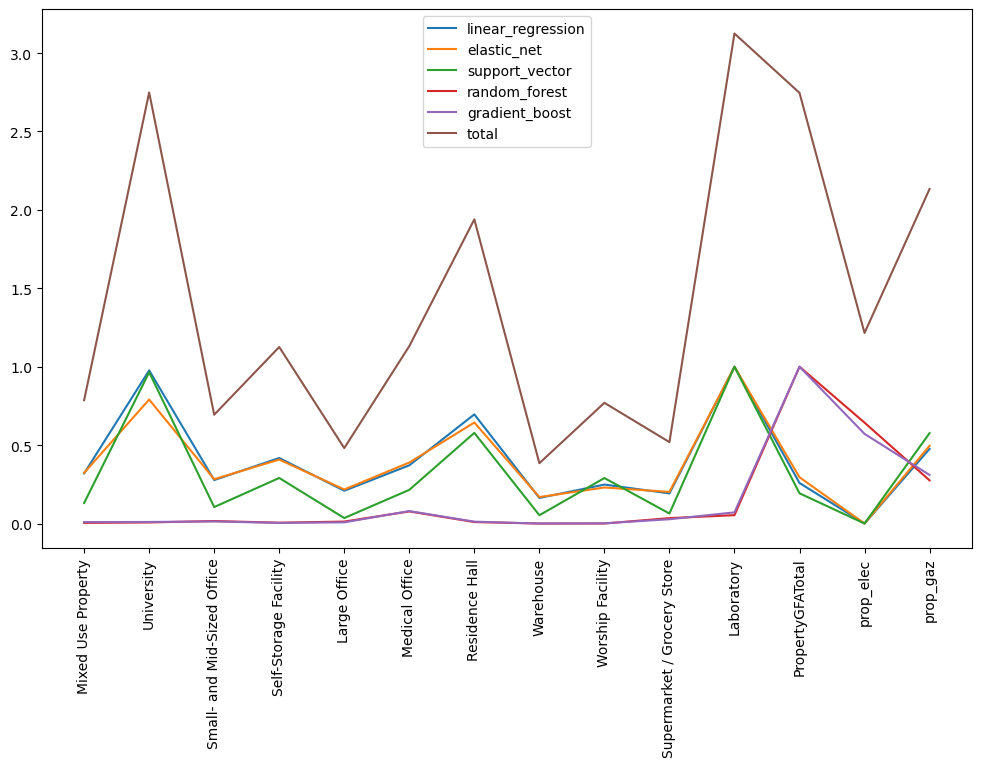

In [30]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

##### [sommaire](#S)

## C, Modèle de prédiction de la variable Energie site <a class='anchor' id='IVC'></a>

In [31]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, ye, test_size=0.3)

### 1, Mise en place et essai du modèle <a class='anchor' id='IVC1'></a>

elastic_net
param_alpha
Meilleur valeur [0.001]


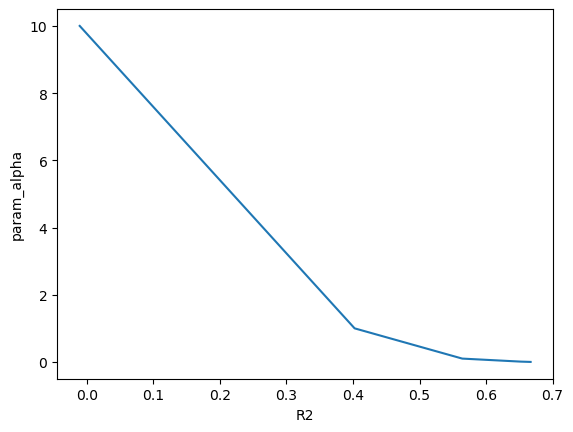

elastic_net
param_l1_ratio
Meilleur valeur [1.]


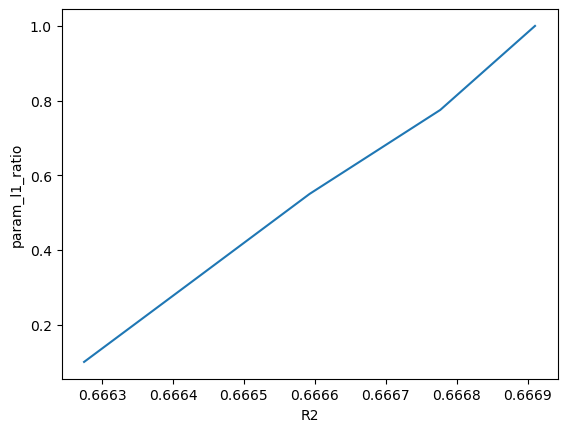

SVR
param_C
Meilleur valeur [3.]


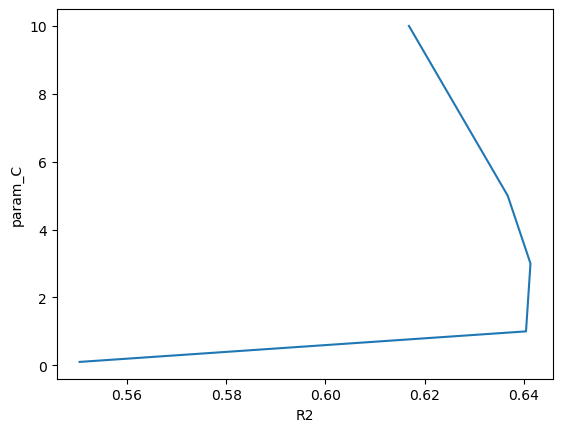

SVR
param_gamma
Meilleur valeur [0.1]


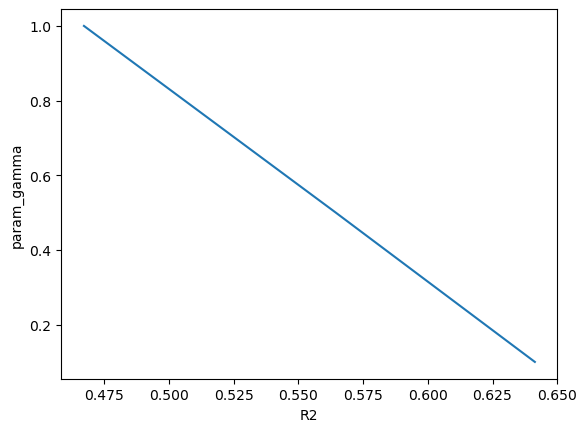

knn_regressor
param_n_neighbors
Meilleur valeur [10.]


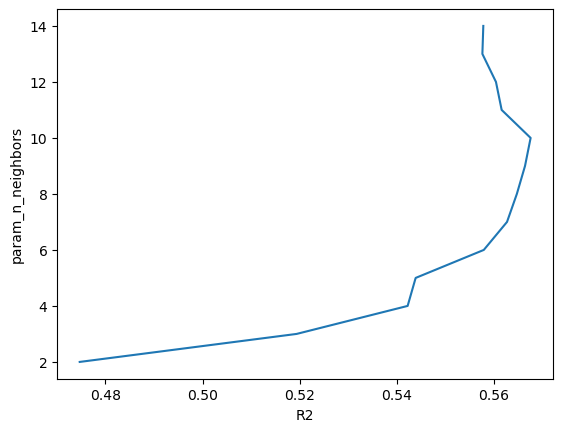

random_forest
param_min_samples_split
Meilleur valeur [10.]


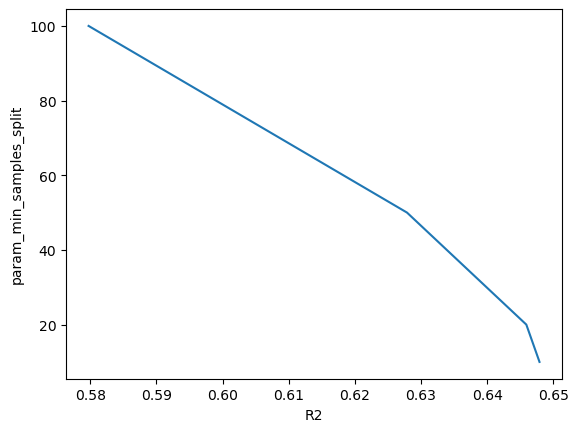

random_forest
param_n_estimators
Meilleur valeur [1000.]


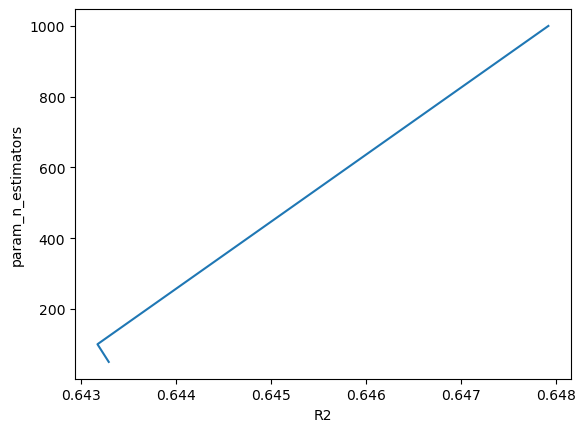

gradient_boost
param_n_estimators
Meilleur valeur [100.]


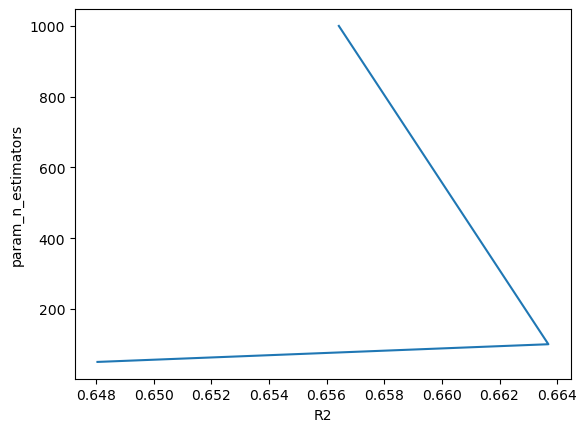

gradient_boost
param_loss
Meileur valeur ['ls']


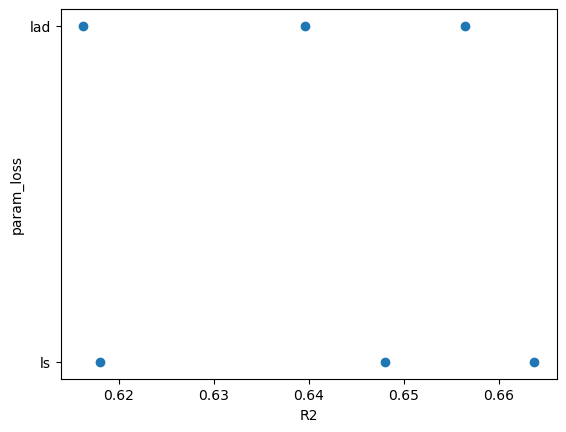

In [32]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [33]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,-5.972571e+22,{},0.645537,0.352368,0.032734,0.002000
1,elastic_net,6.669104e-01,"{'alpha': 0.001, 'l1_ratio': 1.0}",0.645604,0.358941,0.032809,0.001001
2,SVR,6.413632e-01,"{'C': 3, 'gamma': 0.1}",0.646459,0.343593,0.032539,0.057031
3,knn_regressor,5.675282e-01,{'n_neighbors': 10},0.734112,0.411601,0.037344,0.000000
4,random_forest,6.479158e-01,"{'min_samples_split': 10, 'n_estimators': 1000}",0.668248,0.366048,0.033358,3.554964
5,gradient_boost,6.636937e-01,"{'loss': 'ls', 'n_estimators': 100}",0.656646,0.362967,0.033354,0.123930


In [34]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,6.413632e-01,0.012400,NaN,NaN,3.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,6.669104e-01,0.000200,0.001,1.0,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,6.636937e-01,0.001003,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,5.675282e-01,0.003000,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
linear_regression,linear_regression,-5.972571e+22,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,6.479158e-01,0.089193,NaN,NaN,NaN,NaN,NaN,10.0,1000.0,NaN


##### [sommaire](#S)

### 2, Détermination des coefficients <a calss='anchor' id='IVC2'></a>

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [36]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,1.000000e+00,0.297357,0.273216,0.019795,0.025580,1.615948
Other,1.000000e+00,0.560331,0.426118,0.000000,0.000000,1.986450
Mixed Use Property,1.000000e+00,0.560331,0.514945,0.001426,0.000000,2.076703
K-12 School,1.000000e+00,0.384449,0.343365,0.008634,0.010163,1.746611
University,1.000000e+00,0.966842,1.000000,0.007783,0.010443,2.985067
Small- and Mid-Sized Office,1.000000e+00,0.576212,0.544537,0.001422,0.000000,2.122171
Self-Storage Facility,1.000000e+00,0.666480,0.639286,0.001947,0.002916,2.310629
Large Office,1.000000e+00,0.584013,0.545925,0.012837,0.009491,2.152266
Senior Care Community,1.000000e+00,0.560331,0.509598,0.000071,0.000000,2.070000
Medical Office,1.000000e+00,0.636085,0.589811,0.025716,0.026637,2.278249


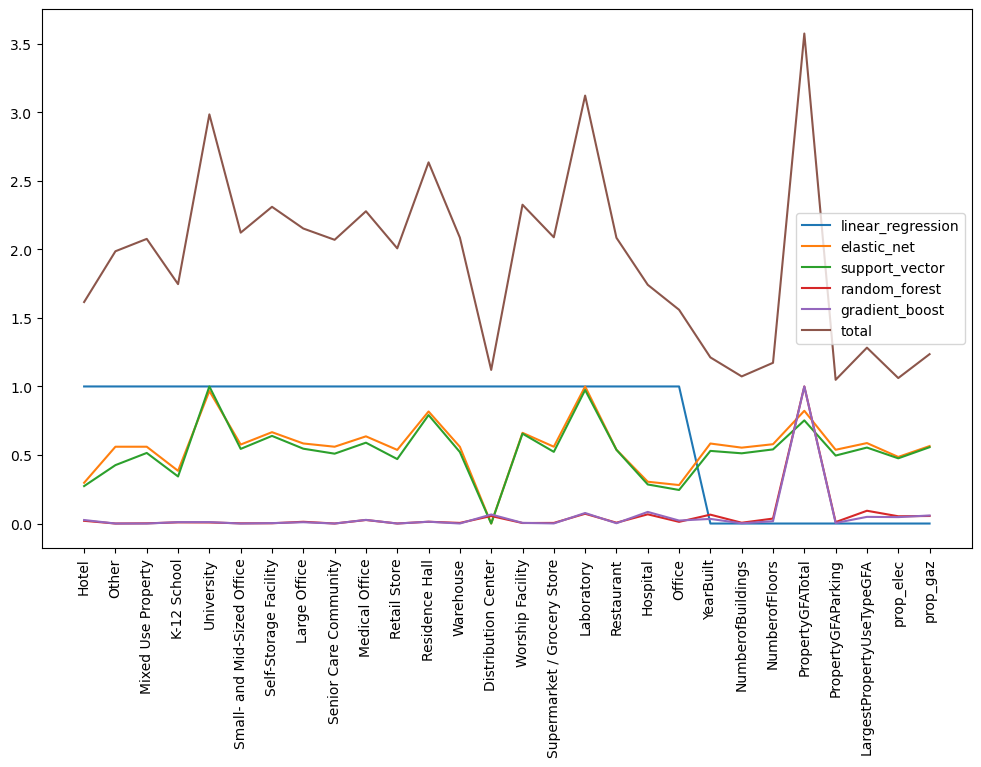

In [37]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

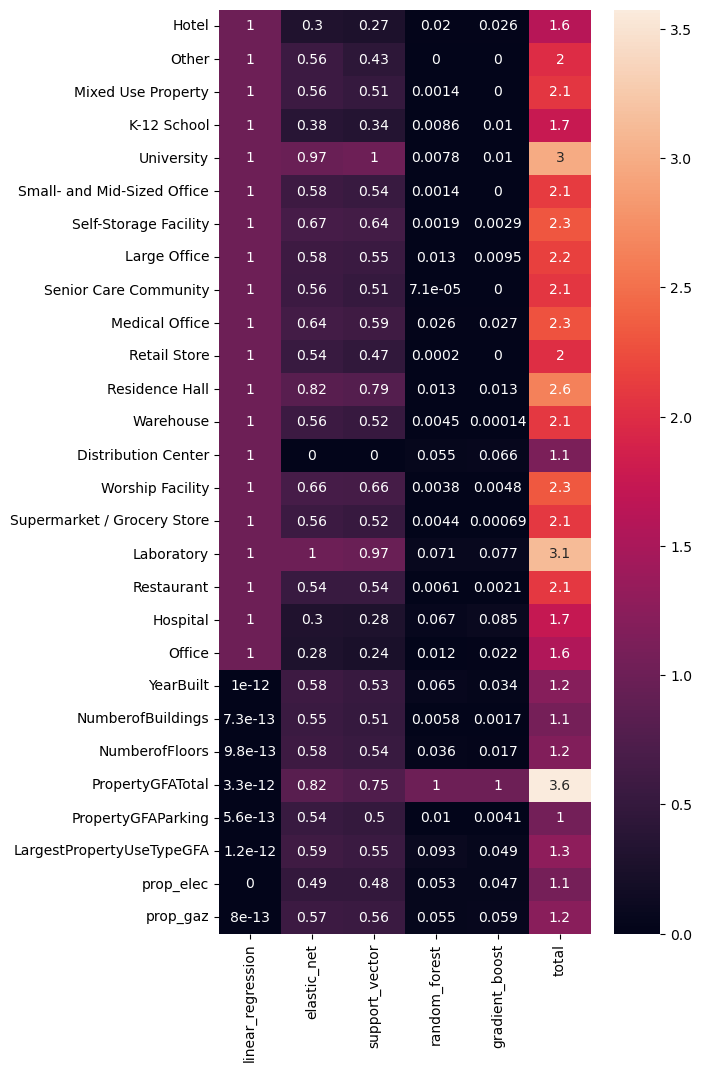

In [38]:
plt.figure(figsize=(6,12))
sns.heatmap(coefs_n, annot=True)
plt.show()

In [39]:
y_pred = xb.predict(X_test)
df_lr = pd.DataFrame(y_test)
df_y = y_pred
lrg = LinearRegression()
lrg.fit(df_lr, df_y)

LinearRegression()

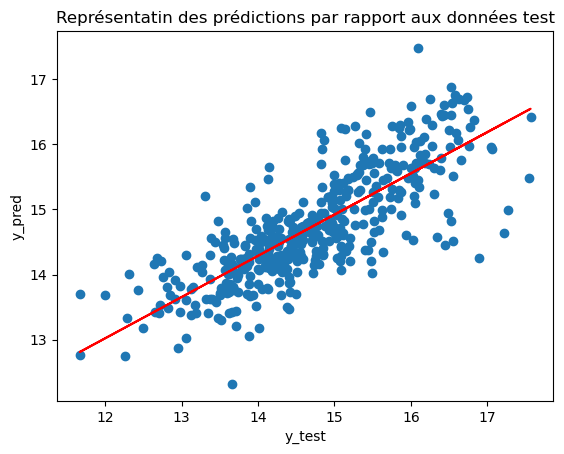

In [40]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, lrg.predict(df_lr), color='red')
plt.title('Représentation des prédictions par rapport aux données test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##### [sommaire](#S)

### 3, Liste réduite <a calss='anchor' id='IVC3'></a>

In [41]:
liste = coefs_n[coefs_n.total > 2].index
df_reduit = dfx.loc[:, liste]
df_reduit.columns

Index(['Mixed Use Property', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Large Office', 'Senior Care Community',
       'Medical Office', 'Retail Store', 'Residence Hall', 'Warehouse',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Restaurant', 'PropertyGFATotal'],
      dtype='object')

In [42]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_reduit.values, ye, test_size=0.3)

In [43]:
dfx.shape

(1468, 28)

In [44]:
df_reduit.shape

(1468, 15)

elastic_net
param_alpha
Meilleur valeur [0.001]


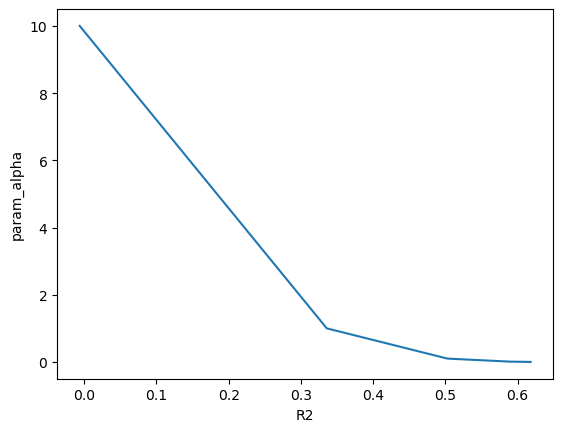

elastic_net
param_l1_ratio
Meilleur valeur [0.1]


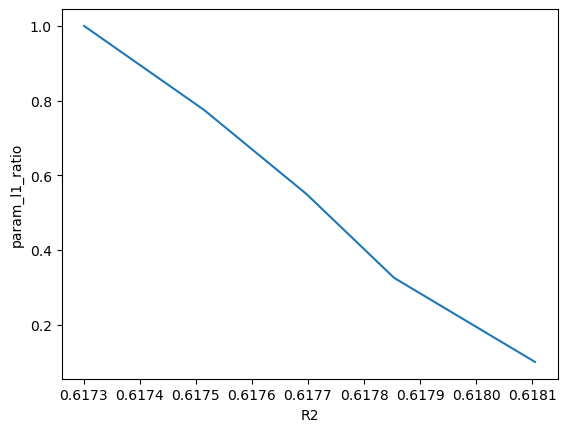

SVR
param_C
Meilleur valeur [10.]


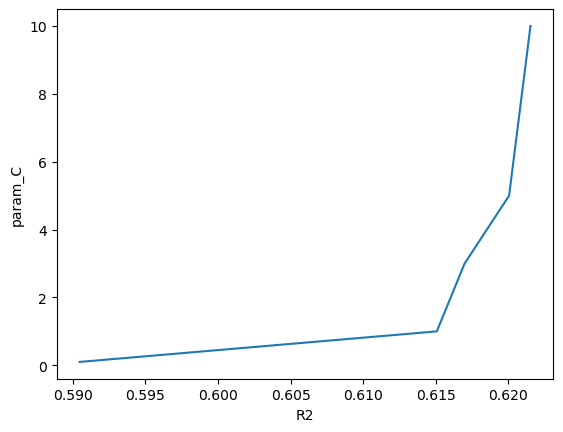

SVR
param_gamma
Meilleur valeur [0.1]


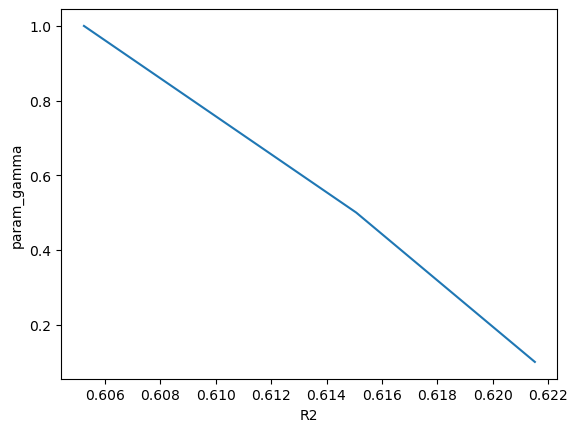

knn_regressor
param_n_neighbors
Meilleur valeur [6.]


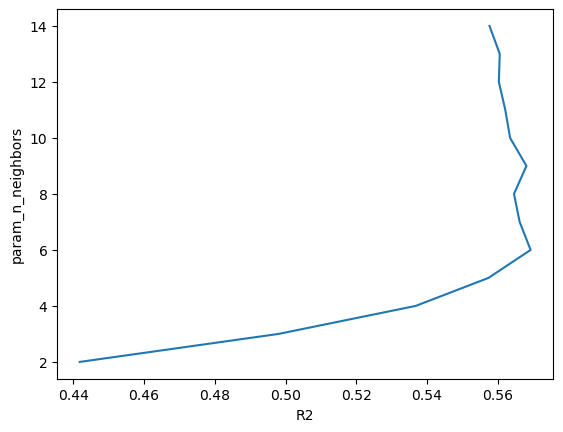

random_forest
param_min_samples_split
Meilleur valeur [50.]


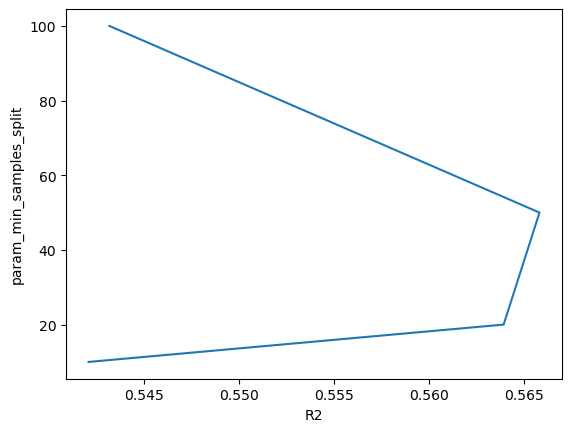

random_forest
param_n_estimators
Meilleur valeur [1000.]


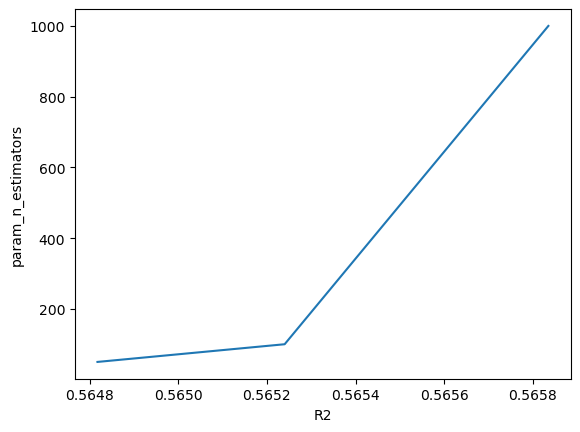

gradient_boost
param_n_estimators
Meilleur valeur [100.]


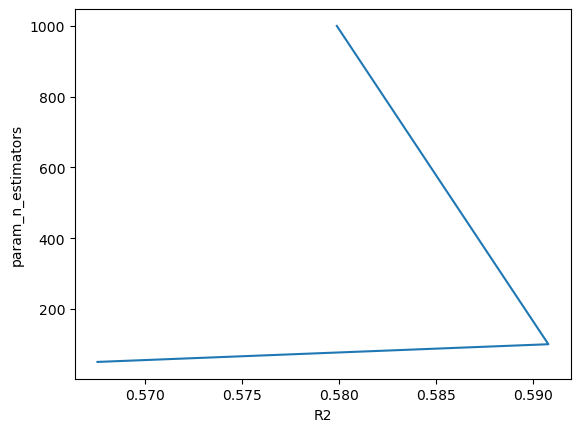

gradient_boost
param_loss
Meileur valeur ['ls']


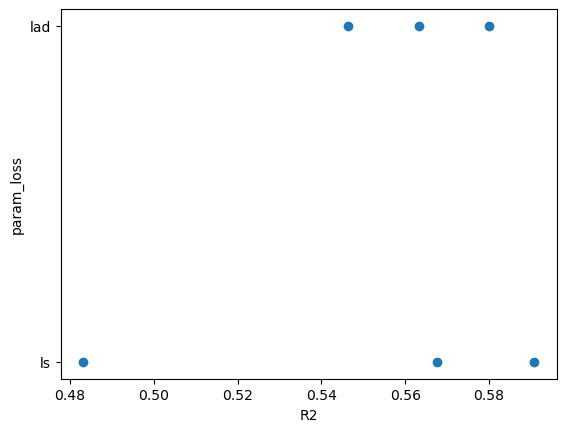

In [45]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [46]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,0.620124,{},0.664291,0.370829,0.034102,0.004001
1,elastic_net,0.618105,"{'alpha': 0.001, 'l1_ratio': 0.1}",0.662505,0.364481,0.033929,0.003998
2,SVR,0.621528,"{'C': 10, 'gamma': 0.1}",0.669721,0.368816,0.033752,0.060232
3,knn_regressor,0.569280,{'n_neighbors': 6},0.687939,0.455600,0.036333,0.000000
4,random_forest,0.565835,"{'min_samples_split': 50, 'n_estimators': 1000}",0.677830,0.370438,0.034227,1.656036
5,gradient_boost,0.590807,"{'loss': 'ls', 'n_estimators': 100}",0.669083,0.357720,0.033841,0.056001


In [47]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,0.621528,0.014037,NaN,NaN,10.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,0.618105,0.000000,0.001,0.1,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,0.590807,0.000801,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,0.569280,0.004000,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
linear_regression,linear_regression,0.620124,0.000799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,0.565835,0.067669,NaN,NaN,NaN,NaN,NaN,50.0,1000.0,NaN


In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in df_reduit.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in df_reduit.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in df_reduit.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in df_reduit.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in df_reduit.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [49]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Mixed Use Property,0.221401,0.298350,0.279467,0.011732,0.012481,0.823431
University,0.975698,0.719458,0.904869,0.008958,0.010909,2.619892
Small- and Mid-Sized Office,0.019831,0.122346,0.128004,0.004733,0.010192,0.285105
Self-Storage Facility,0.172090,0.253209,0.236080,0.004912,0.008760,0.675051
Large Office,0.114975,0.211414,0.173008,0.016818,0.018547,0.534762
Senior Care Community,0.005110,0.000000,0.000000,0.000000,0.000000,0.005110
Medical Office,0.231182,0.322599,0.283746,0.042758,0.051885,0.932169
Retail Store,0.093279,0.172900,0.261950,0.001532,0.002959,0.532620
Residence Hall,0.718205,0.684542,0.735336,0.018795,0.020348,2.177226
Warehouse,0.078003,0.177029,0.193813,0.010825,0.010600,0.470269


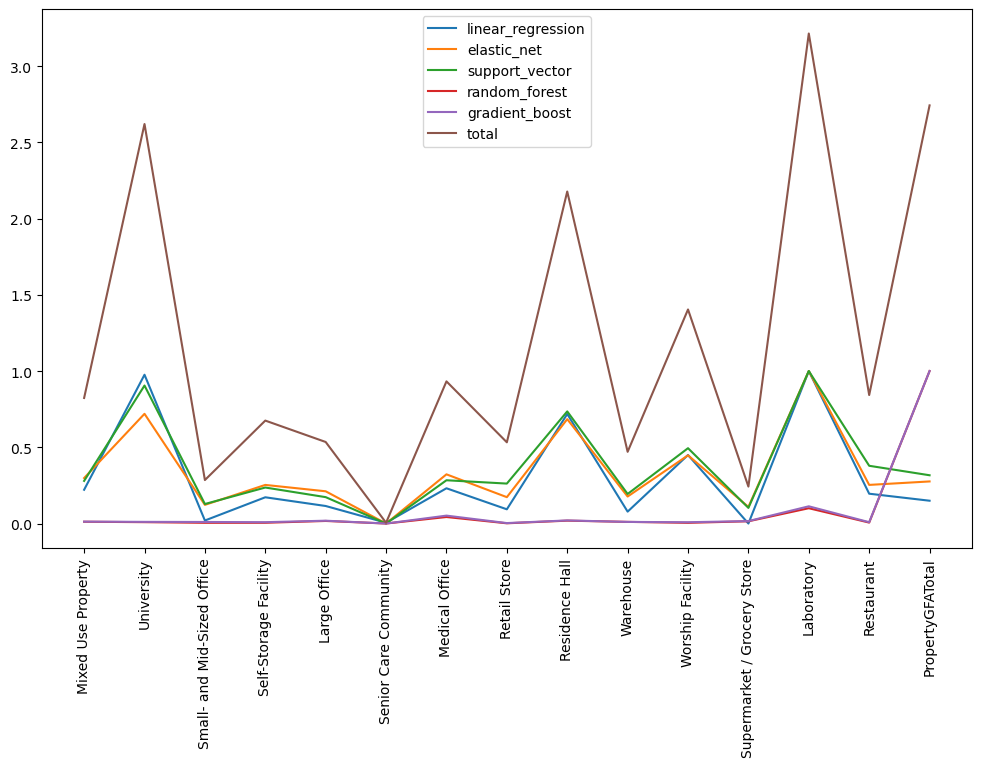

In [50]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

##### [sommaire](#S)

## V, Pertinence de la variable Energie star score <a class='anchor' id='V'></a>

### A, préparation des données <a class='anchor' id='VA'></a>

In [51]:
dfl.head(2)

,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,prop_elec,prop_gaz
0,Hotel,1927,0.693147,2.564949,11.390012,0.0,11.390012,15.793246,5.521381,0.562802,0.218666
1,Hotel,1926,0.693147,2.397895,11.023861,0.0,11.023861,15.731637,5.657494,0.472844,0.333217


In [52]:
df_15 = pd.read_csv('2015-building-energy-benchmarking.csv')
df_16 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [53]:
df_15.rename(columns={"GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions"}, inplace=True)
diff = df_15.merge(df_16, how='inner', on='OSEBuildingID')
plus = df_15[~df_15.OSEBuildingID.isin(diff.OSEBuildingID)]
df = pd.concat([df_16, plus])

In [54]:
liste = dfl.columns

In [55]:
n_liste = []
for c in df.columns:
    if c in liste:
        n_liste.append(c)
n_liste.append('ENERGYSTARScore')

In [56]:
df = df.loc[:,n_liste]

In [57]:
# Ajout constante pour passage au log
for c in df.columns[2:]:
    if df[df[c] == 0].shape[0] != 0:
        df[c] = df[c]+1
    elif c == 'ENERGYSTARScore':
        continue
    df[c] = np.log(df[c])

In [58]:
dfl['combine'] = dfl.drop(['prop_elec', 'prop_gaz', 'TotalGHGEmissions'], axis=1).sum(axis=1, numeric_only=True)

In [59]:
df['combine'] = df.drop(['ENERGYSTARScore', 'TotalGHGEmissions'], axis=1).sum(axis=1, numeric_only=True)

In [60]:
dft = df.loc[:,['combine', 'ENERGYSTARScore']]

In [61]:
dft[dft.duplicated(subset='combine')]

,combine,ENERGYSTARScore


In [62]:
df_ES = dfl.merge(dft, how='left', on='combine')

In [63]:
df_ES = df_ES.drop('combine', axis=1)

In [64]:
df_ES.isna().sum()

PrimaryPropertyType            0
YearBuilt                      0
NumberofBuildings              0
NumberofFloors                 0
PropertyGFATotal               0
PropertyGFAParking             0
LargestPropertyUseTypeGFA      0
SiteEnergyUse(kBtu)            0
TotalGHGEmissions              0
prop_elec                      0
prop_gaz                       0
ENERGYSTARScore              503
dtype: int64

In [65]:
df1 = df_ES.dropna(axis=0)

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
si = SimpleImputer( missing_values=np.nan, strategy='mean')

In [68]:
X = df_ES.drop(['PrimaryPropertyType'], axis=1).values

In [69]:
df2 = pd.DataFrame(si.fit_transform(X), columns=[i for i in df_ES.columns[1:]])

In [70]:
df2['PrimaryPropertyType'] = df_ES['PrimaryPropertyType']

##### [sommaire](#S)

### B, Essai sur df avec na supprimé pour GHGE<a class= 'anchor' id='VB'></a>

In [71]:
dfx = df1.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
ye = df1['SiteEnergyUse(kBtu)']
yg = df1.TotalGHGEmissions

In [72]:
dfxx = dfx.drop(['PrimaryPropertyType'], axis=1)
normalise = StandardScaler()
X_scaled = normalise.fit_transform(dfxx)
dfxx = pd.DataFrame(X_scaled, columns=dfxx.columns)

In [73]:
ohe = OneHotEncoder()
X = ohe.fit_transform(dfx.PrimaryPropertyType.values.reshape(-1,1)).toarray()
dfohe = pd.DataFrame(X, columns=[i for i in df1.PrimaryPropertyType.unique()])
dfx = dfohe.merge(dfxx, how='left', left_index=True, right_index=True)
X = dfx.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, yg, test_size=0.3)

elastic_net
param_alpha
Meilleur valeur [0.001]


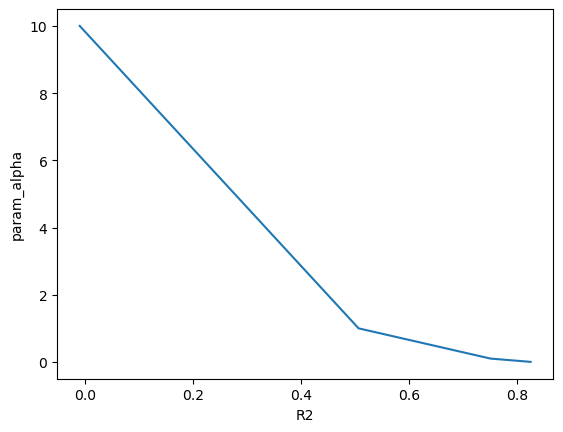

elastic_net
param_l1_ratio
Meilleur valeur [1.]


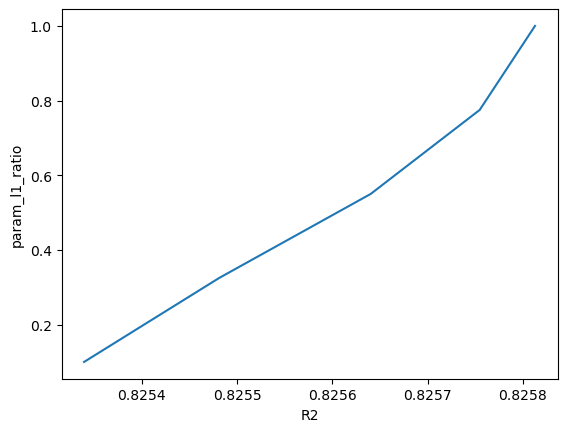

SVR
param_C
Meilleur valeur [1.]


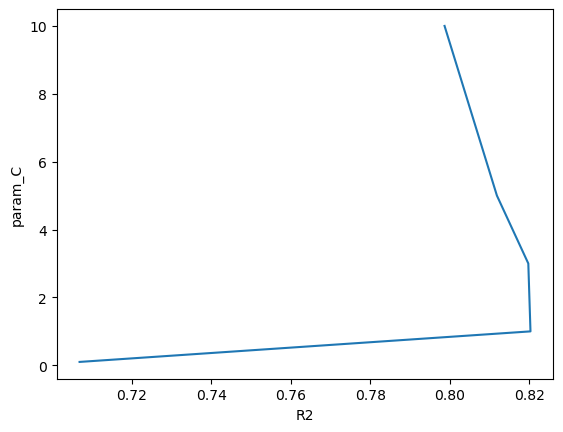

SVR
param_gamma
Meilleur valeur [0.1]


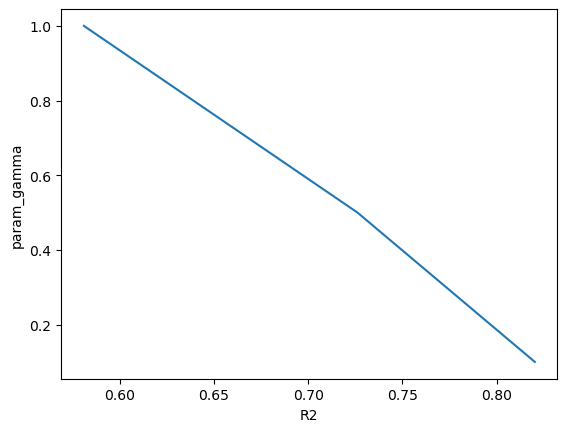

knn_regressor
param_n_neighbors
Meilleur valeur [3.]


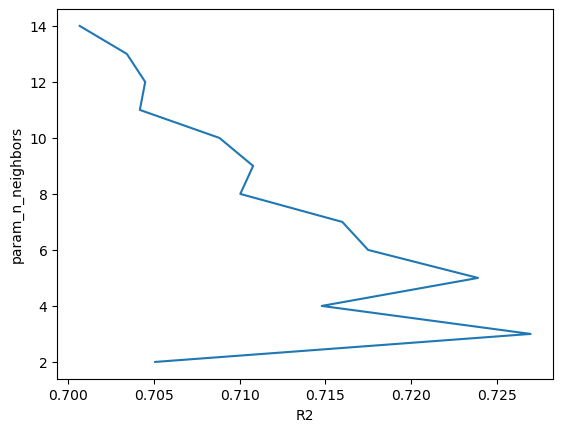

random_forest
param_min_samples_split
Meilleur valeur [10.]


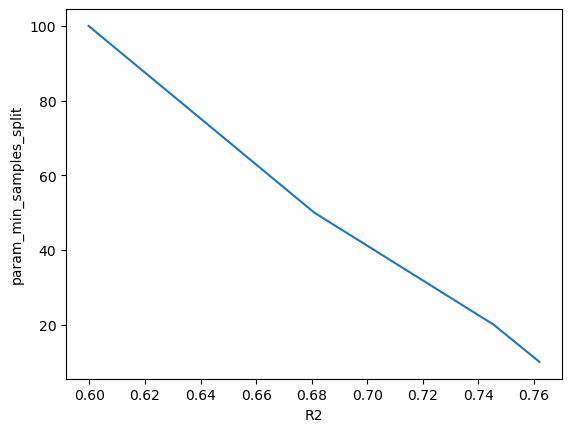

random_forest
param_n_estimators
Meilleur valeur [1000.]


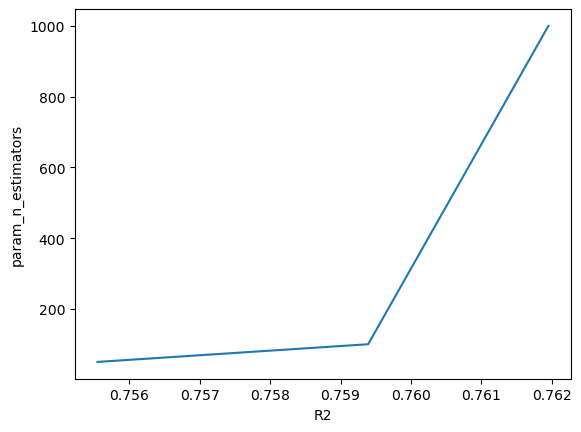

gradient_boost
param_n_estimators
Meilleur valeur [100.]


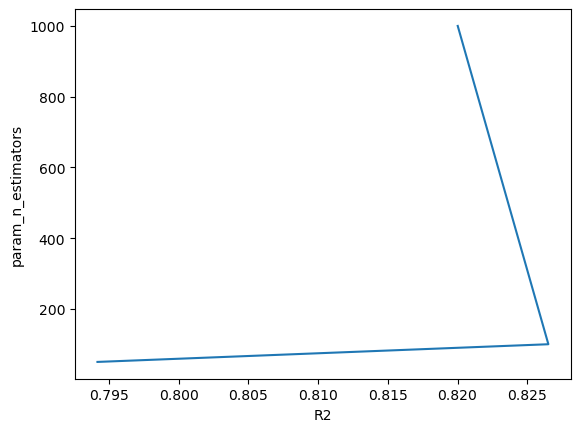

gradient_boost
param_loss
Meileur valeur ['ls']


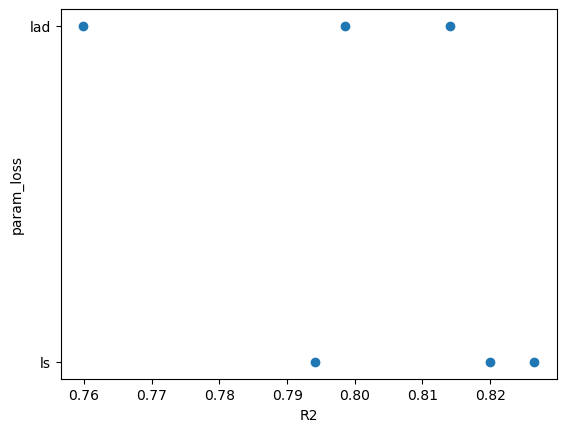

In [74]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [75]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,0.824912,{},0.472391,0.189782,0.112407,0.002001
1,elastic_net,0.825813,"{'alpha': 0.001, 'l1_ratio': 1.0}",0.473179,0.189979,0.113150,0.004004
2,SVR,0.820300,"{'C': 1, 'gamma': 0.1}",0.468296,0.208631,0.114867,0.026999
3,knn_regressor,0.726958,{'n_neighbors': 3},0.610423,0.337521,0.147277,0.000000
4,random_forest,0.761950,"{'min_samples_split': 10, 'n_estimators': 1000}",0.535025,0.281363,0.141674,2.312200
5,gradient_boost,0.826517,"{'loss': 'ls', 'n_estimators': 100}",0.470566,0.262454,0.123376,0.093002


In [76]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,0.820300,0.005712,NaN,NaN,1.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,0.825813,0.000000,0.001,1.0,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,0.826517,0.000800,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,0.726958,0.001801,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
linear_regression,linear_regression,0.824912,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,0.761950,0.066994,NaN,NaN,NaN,NaN,NaN,10.0,1000.0,NaN


In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [78]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,0.103491,0.116575,0.050120,0.013859,0.029551,0.313596
K-12 School,0.413345,0.466266,0.379525,0.000032,0.000000,1.259168
Small- and Mid-Sized Office,0.459803,0.466266,0.437154,0.003910,0.000378,1.367510
Large Office,0.286032,0.293626,0.262335,0.002744,0.002349,0.847085
Senior Care Community,0.573349,0.558989,0.530563,0.018376,0.000000,1.681277
Medical Office,0.494560,0.479675,0.442886,0.000805,0.000665,1.418591
Retail Store,0.585244,0.550905,0.458481,0.002576,0.007591,1.604798
Residence Hall,0.387635,0.466266,0.379447,0.000000,0.000000,1.233347
Other,0.725554,0.679092,0.456664,0.020232,0.030941,1.912484
Warehouse,0.396595,0.420167,0.334173,0.000334,0.000000,1.151269


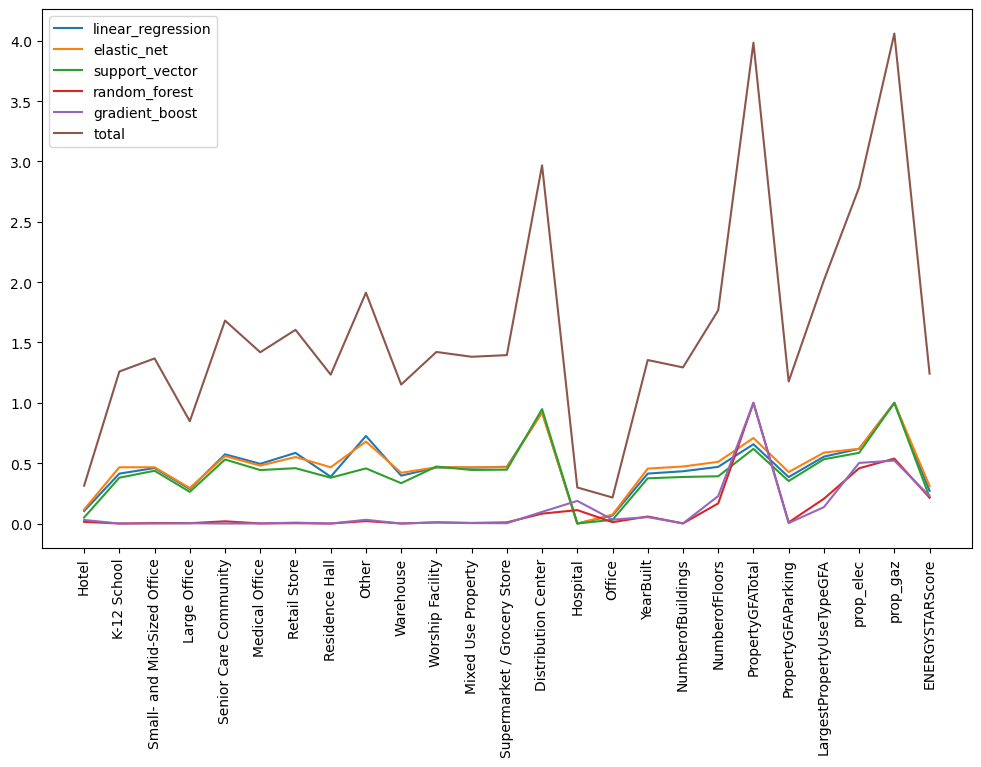

In [79]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

In [80]:
y_pred = xb.predict(X_test)
df_lr = pd.DataFrame(y_test)
df_y = y_pred
lrg = LinearRegression()
lrg.fit(df_lr, df_y)

LinearRegression()

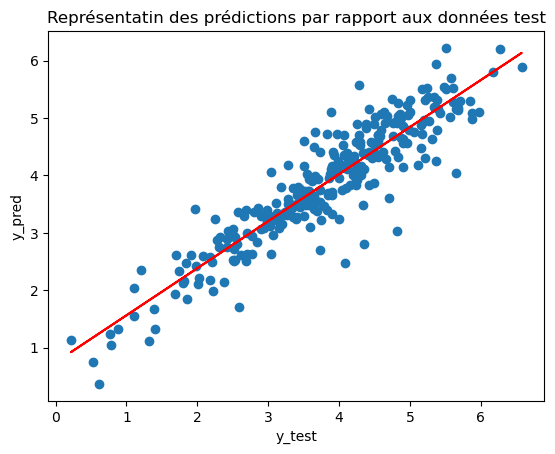

In [81]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, lrg.predict(df_lr), color='red')
plt.title('Représentatin des prédictions par rapport aux données test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##### [sommaire](#S)

### C, Essai sur df avec na supprimé pour énergie<a class= 'anchor' id='VC'></a>

In [82]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, ye, test_size=0.3)

elastic_net
param_alpha
Meilleur valeur [0.001]


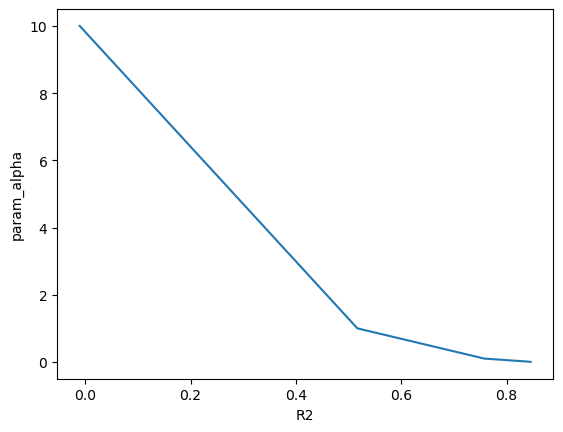

elastic_net
param_l1_ratio
Meilleur valeur [1.]


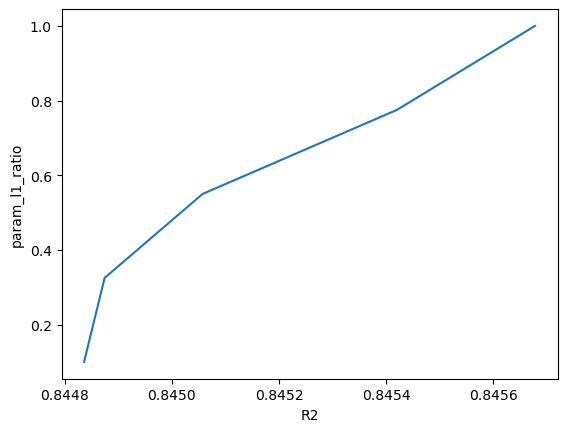

SVR
param_C
Meilleur valeur [3.]


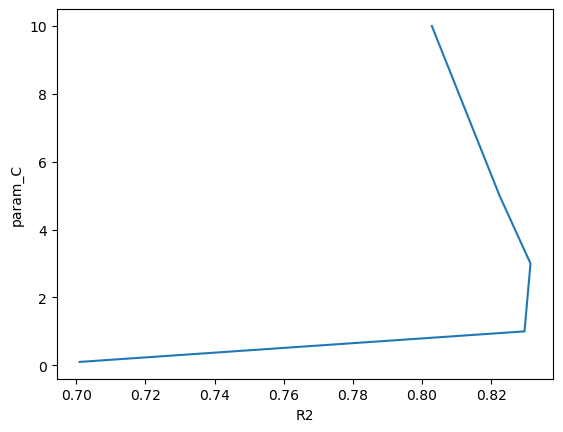

SVR
param_gamma
Meilleur valeur [0.1]


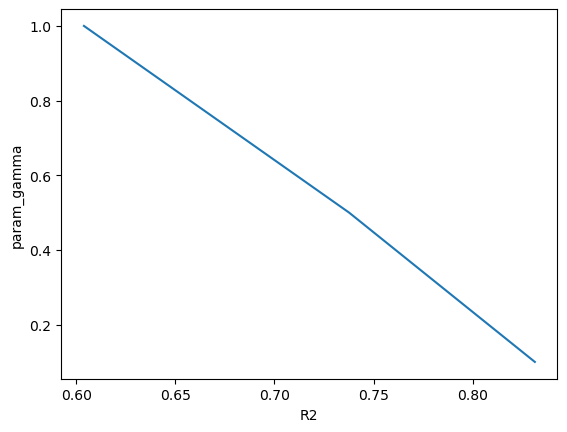

knn_regressor
param_n_neighbors
Meilleur valeur [5.]


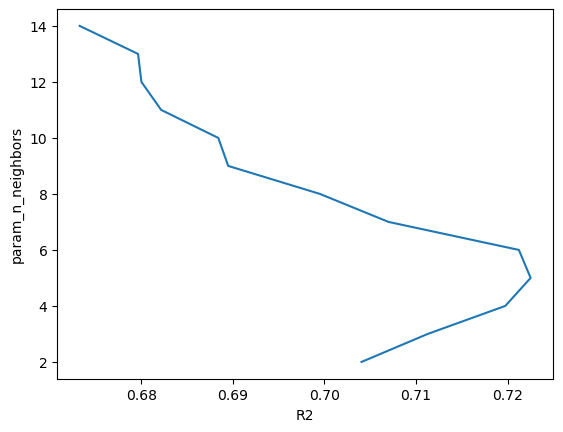

random_forest
param_min_samples_split
Meilleur valeur [10.]


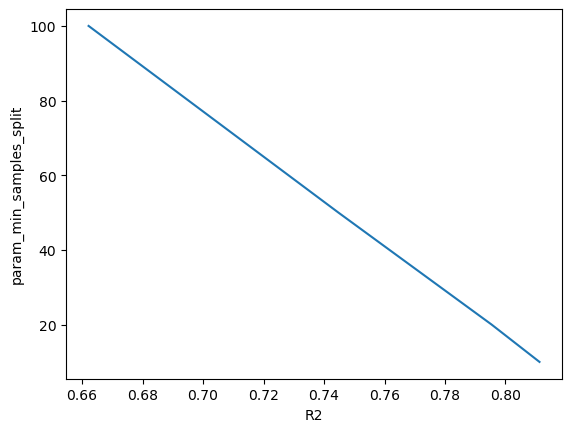

random_forest
param_n_estimators
Meilleur valeur [50.]


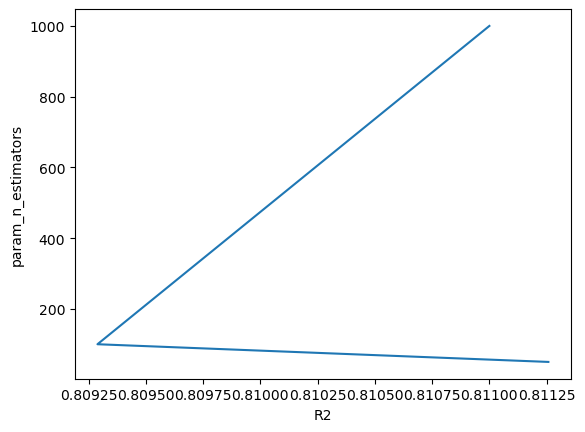

gradient_boost
param_n_estimators
Meilleur valeur [100.]


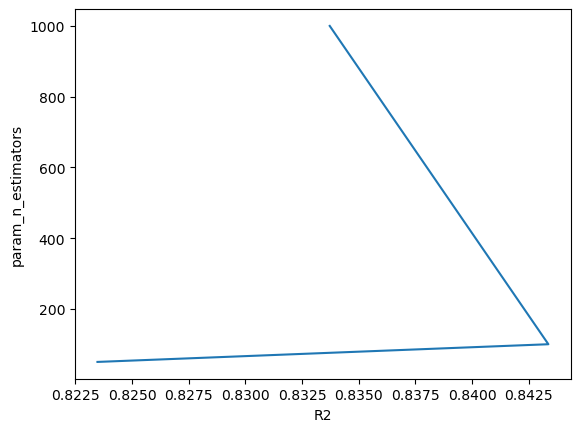

gradient_boost
param_loss
Meileur valeur ['ls']


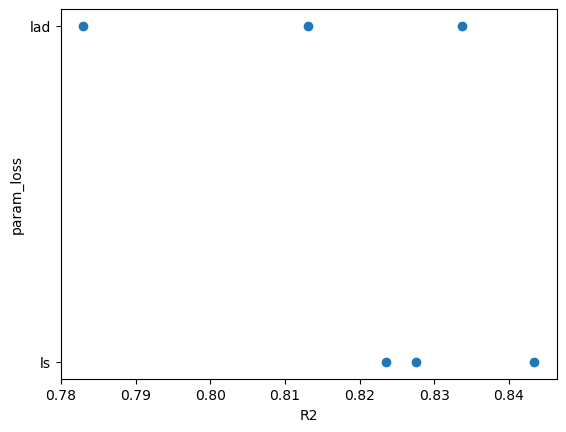

In [83]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [84]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,0.843780,{},0.433508,0.185241,0.018522,0.000000
1,elastic_net,0.845678,"{'alpha': 0.001, 'l1_ratio': 1.0}",0.437154,0.191777,0.018647,0.000998
2,SVR,0.831337,"{'C': 3, 'gamma': 0.1}",0.457432,0.200423,0.020440,0.027969
3,knn_regressor,0.722512,{'n_neighbors': 5},0.572331,0.255127,0.026002,0.000000
4,random_forest,0.811258,"{'min_samples_split': 10, 'n_estimators': 50}",0.502792,0.238407,0.022800,0.172102
5,gradient_boost,0.843365,"{'loss': 'ls', 'n_estimators': 100}",0.441247,0.218004,0.020276,0.112031


In [85]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,0.831337,0.004801,NaN,NaN,3.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,0.845678,0.000400,0.001,1.0,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,0.843365,0.001610,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,0.722512,0.001202,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
linear_regression,linear_regression,0.843780,0.000603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,0.811258,0.004013,NaN,NaN,NaN,NaN,NaN,10.0,50.0,NaN


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [87]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,0.032276,0.044251,0.018706,0.022480,0.039513,0.157227
K-12 School,0.432330,0.473238,0.395099,0.000000,0.000000,1.300668
Small- and Mid-Sized Office,0.462293,0.473238,0.433093,0.002737,0.001587,1.372948
Large Office,0.312763,0.323063,0.277258,0.002650,0.002656,0.918390
Senior Care Community,0.581898,0.571123,0.531252,0.000808,0.000170,1.685251
Medical Office,0.480502,0.473238,0.464197,0.000145,0.000000,1.418082
Retail Store,0.572483,0.533172,0.527108,0.001222,0.000790,1.634775
Residence Hall,0.400442,0.473238,0.395099,0.000000,0.000115,1.268895
Other,0.715636,0.658573,0.477990,0.011481,0.013289,1.876970
Warehouse,0.391773,0.421961,0.349435,0.000463,0.000000,1.163632


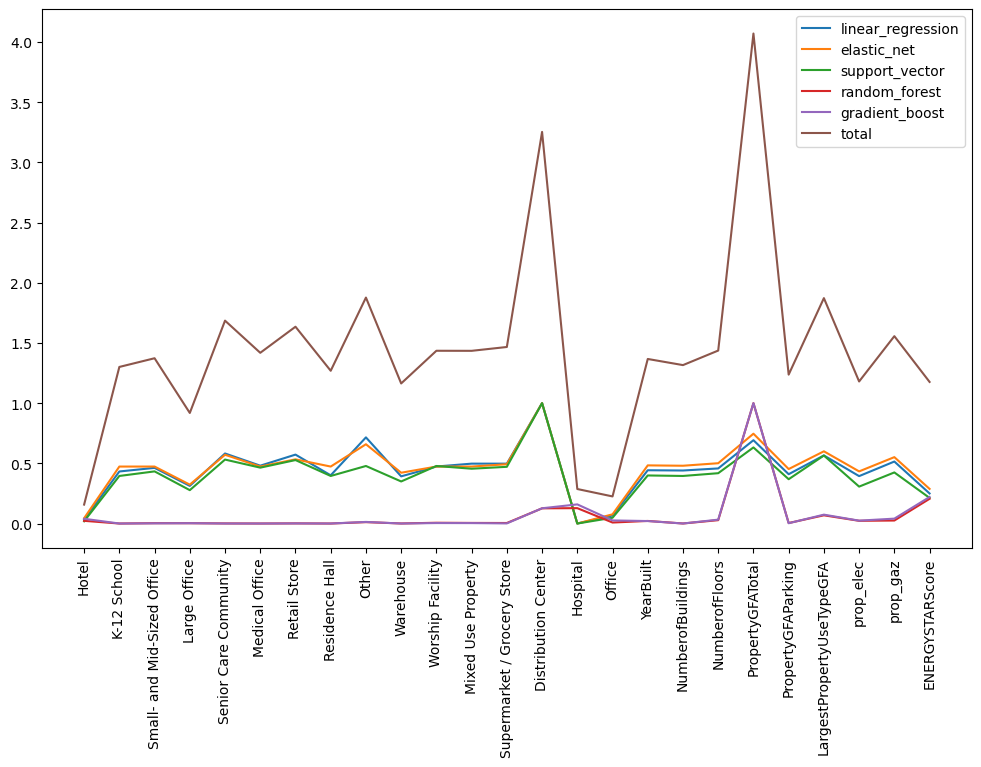

In [88]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

In [89]:
y_pred = xb.predict(X_test)
df_lr = pd.DataFrame(y_test)
df_y = y_pred
lrg = LinearRegression()
lrg.fit(df_lr, df_y)

LinearRegression()

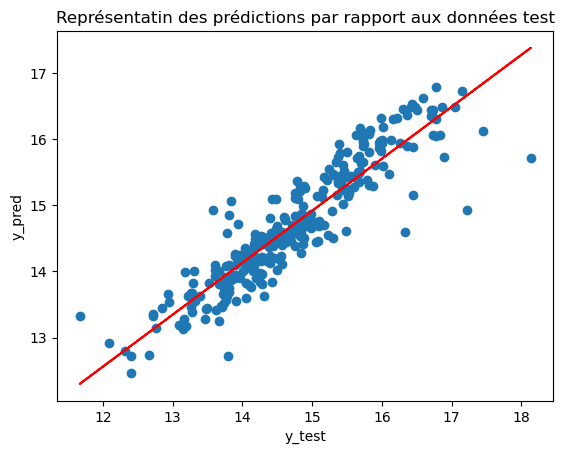

In [90]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, lrg.predict(df_lr), color='red')
plt.title('Représentatin des prédictions par rapport aux données test')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

##### [sommaire](#S)

### D, Essai sur df avec simple imputer pour GHGE <a class='anchor' id='VD'></a>

In [91]:
dfx = df2.drop(['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'], axis=1)
ye = df2['SiteEnergyUse(kBtu)']
yg = df2.TotalGHGEmissions

In [92]:
dfxx = dfx.drop(['PrimaryPropertyType'], axis=1)
normalise = StandardScaler()
X_scaled = normalise.fit_transform(dfxx)
dfxx = pd.DataFrame(X_scaled, columns=dfxx.columns)

In [93]:
ohe = OneHotEncoder()
X = ohe.fit_transform(dfx.PrimaryPropertyType.values.reshape(-1,1)).toarray()
dfohe = pd.DataFrame(X, columns=[i for i in df2.PrimaryPropertyType.unique()])
dfx = dfohe.merge(dfxx, how='left', left_index=True, right_index=True)
X = dfx.values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, yg, test_size=0.3)

elastic_net
param_alpha
Meilleur valeur [0.001]


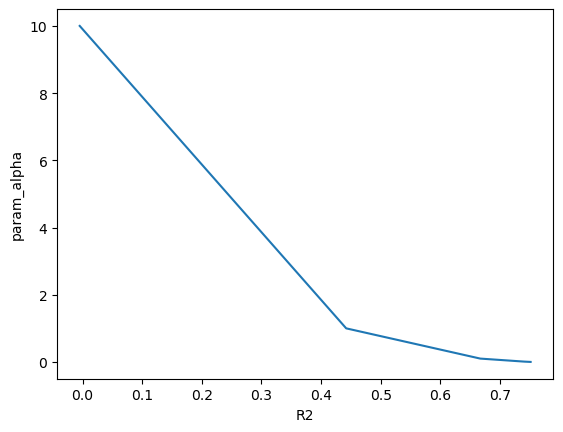

elastic_net
param_l1_ratio
Meilleur valeur [0.325]


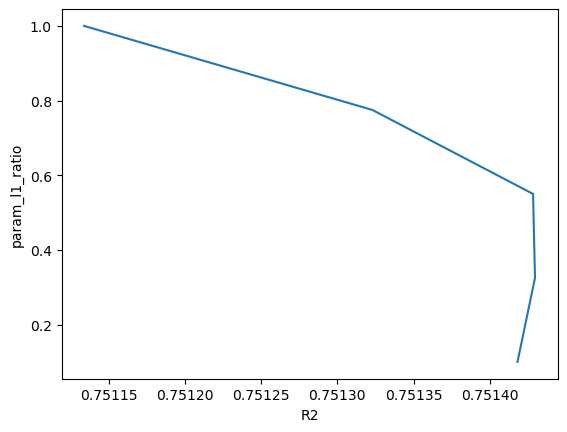

SVR
param_C
Meilleur valeur [3.]


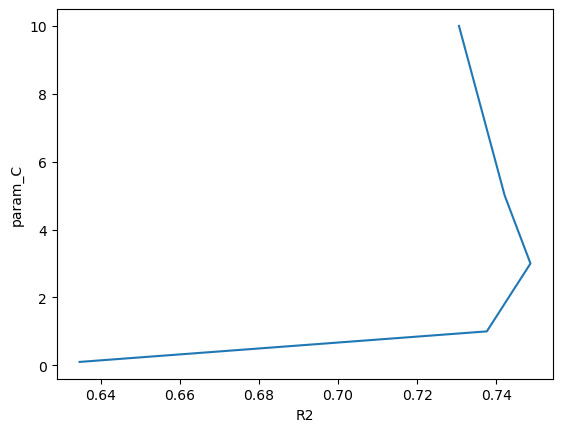

SVR
param_gamma
Meilleur valeur [0.1]


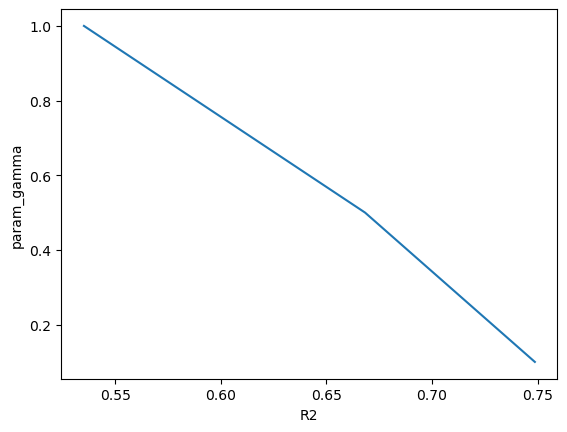

knn_regressor
param_n_neighbors
Meilleur valeur [6.]


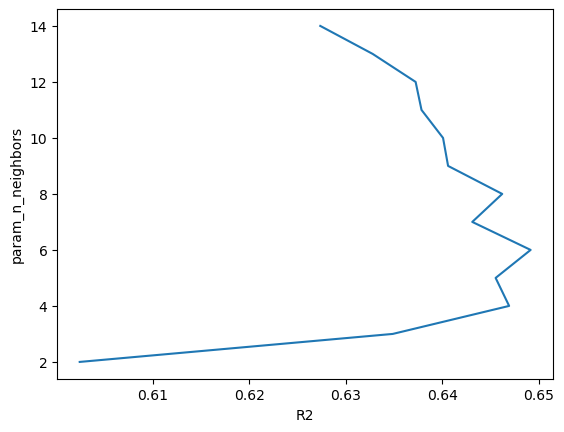

random_forest
param_min_samples_split
Meilleur valeur [10.]


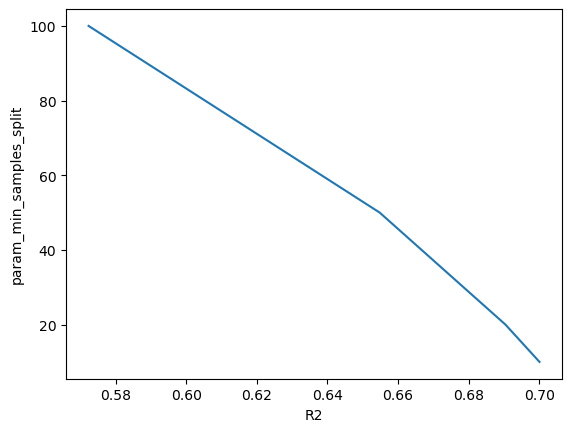

random_forest
param_n_estimators
Meilleur valeur [100.]


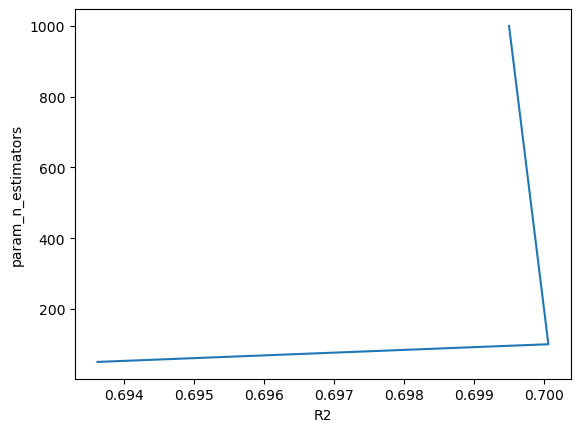

gradient_boost
param_n_estimators
Meilleur valeur [100.]


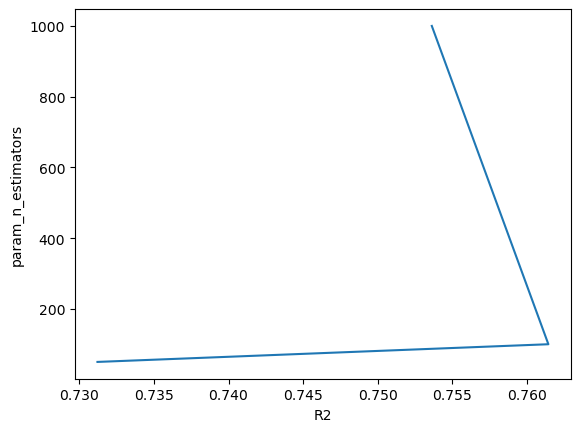

gradient_boost
param_loss
Meileur valeur ['ls']


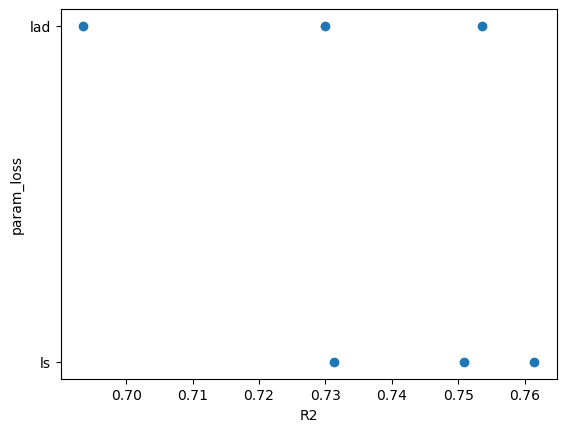

In [94]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [95]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,-5.316801e+21,{},0.704097,0.292473,0.180987,0.003000
1,elastic_net,7.514296e-01,"{'alpha': 0.001, 'l1_ratio': 0.325}",0.702892,0.285266,0.182961,0.005014
2,SVR,7.486392e-01,"{'C': 3, 'gamma': 0.1}",0.688809,0.281611,0.184374,0.061982
3,knn_regressor,6.491701e-01,{'n_neighbors': 6},0.811438,0.386078,0.238137,0.000000
4,random_forest,7.000612e-01,"{'min_samples_split': 10, 'n_estimators': 100}",0.763892,0.374331,0.216218,0.404967
5,gradient_boost,7.614304e-01,"{'loss': 'ls', 'n_estimators': 100}",0.686928,0.309672,0.187898,0.137968


In [96]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,7.486392e-01,0.012000,NaN,NaN,3.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,7.514296e-01,0.000000,0.001,0.325,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,7.614304e-01,0.000600,NaN,NaN,NaN,NaN,NaN,NaN,100.0,ls
knn_regressor,knn_regressor,6.491701e-01,0.003999,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
linear_regression,linear_regression,-5.316801e+21,0.000598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,7.000612e-01,0.008196,NaN,NaN,NaN,NaN,NaN,10.0,100.0,NaN


In [97]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [98]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,1.000000e+00,0.282840,0.198594,0.015239,0.034878,1.531551
Other,1.000000e+00,0.558953,0.489403,0.000000,0.000000,2.048356
Mixed Use Property,1.000000e+00,0.558953,0.490809,0.002903,0.000000,2.052665
K-12 School,1.000000e+00,0.437179,0.374901,0.001969,0.001439,1.815488
University,1.000000e+00,0.927731,1.000000,0.003808,0.004612,2.936151
Small- and Mid-Sized Office,1.000000e+00,0.633516,0.548007,0.004007,0.000000,2.185530
Self-Storage Facility,1.000000e+00,0.573426,0.546679,0.000338,0.000000,2.120443
Large Office,1.000000e+00,0.660288,0.563945,0.011425,0.001361,2.237019
Senior Care Community,1.000000e+00,0.558953,0.454198,0.000015,0.000000,2.013166
Medical Office,1.000000e+00,0.650873,0.548294,0.050456,0.039050,2.288673


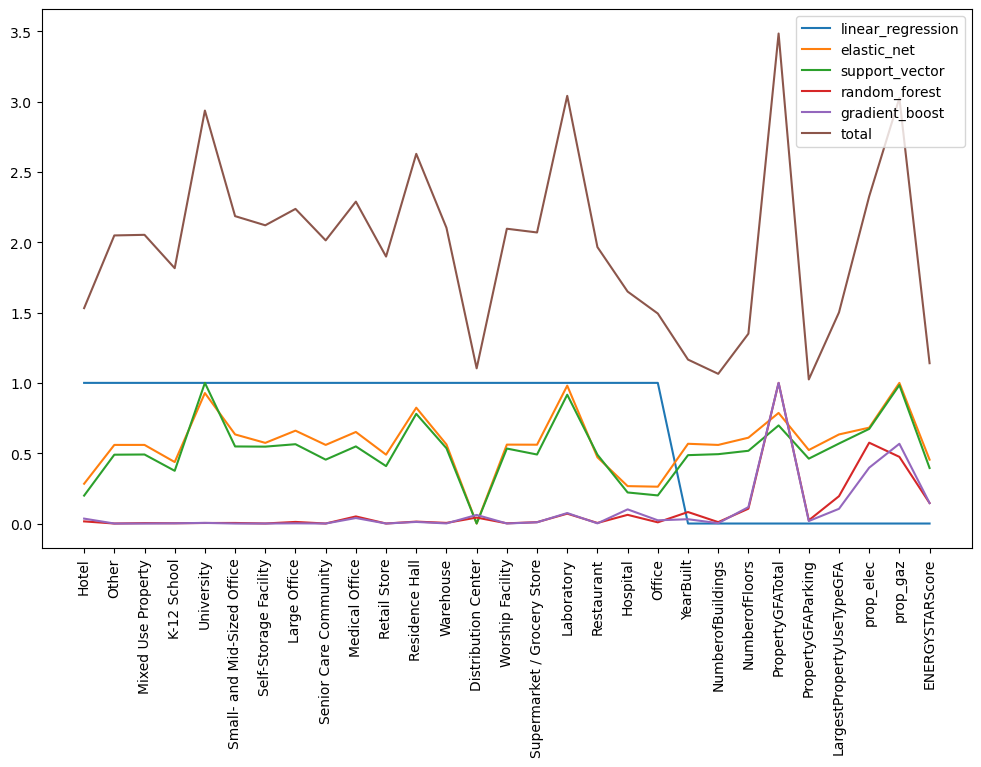

In [99]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

##### [sommaire](#S)

### E, Essai sur df avec simple imputer pour énergie <a class='anchor' id='VE'></a>

In [100]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, yg, test_size=0.3)

elastic_net
param_alpha
Meilleur valeur [0.001]


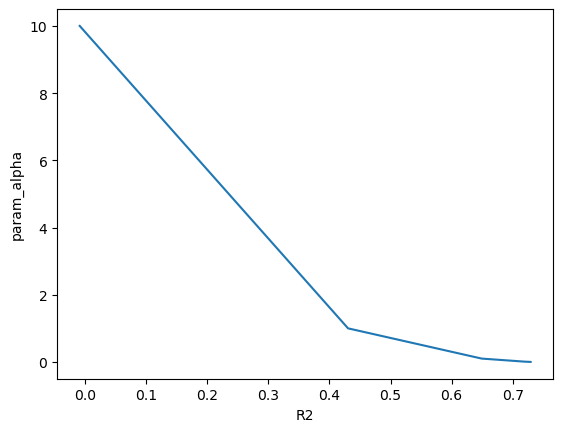

elastic_net
param_l1_ratio
Meilleur valeur [0.55]


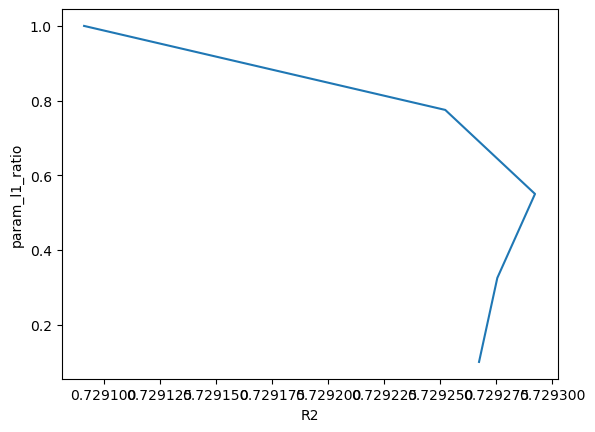

SVR
param_C
Meilleur valeur [3.]


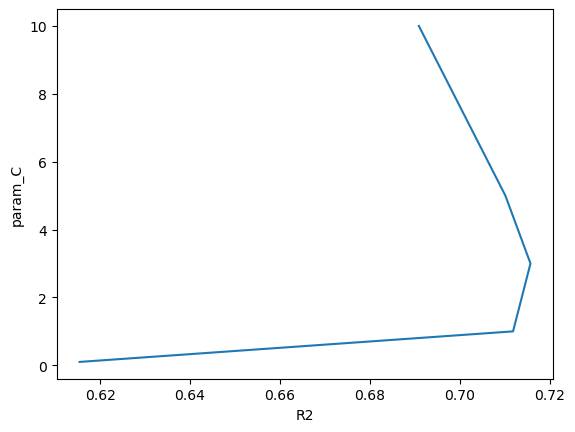

SVR
param_gamma
Meilleur valeur [0.1]


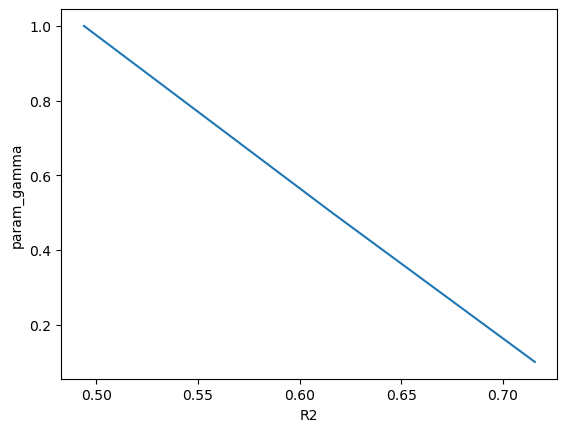

knn_regressor
param_n_neighbors
Meilleur valeur [9.]


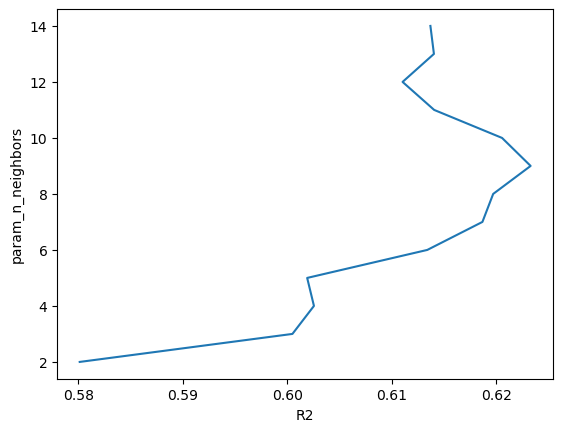

random_forest
param_min_samples_split
Meilleur valeur [10.]


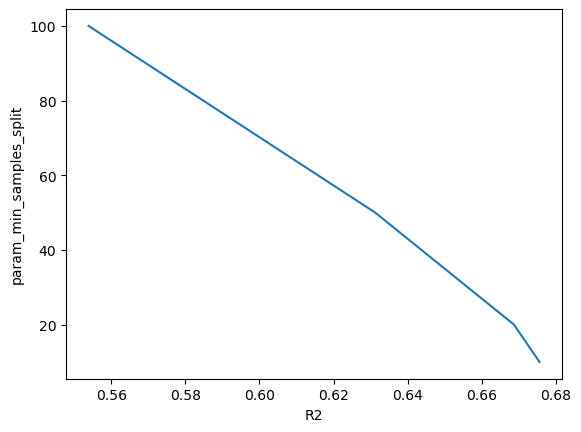

random_forest
param_n_estimators
Meilleur valeur [100.]


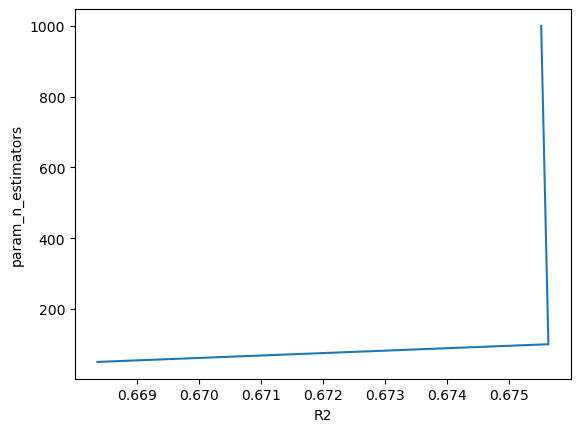

gradient_boost
param_n_estimators
Meilleur valeur [1000.]


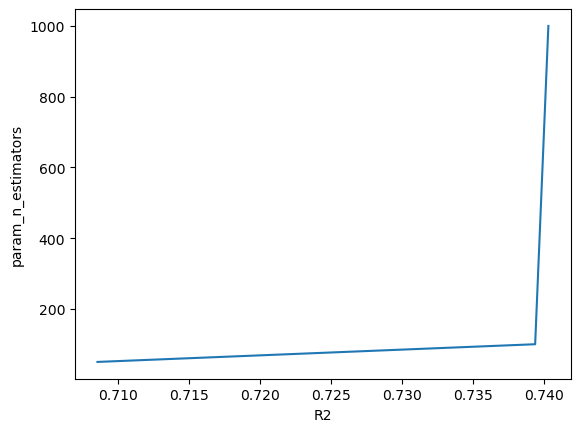

gradient_boost
param_loss
Meileur valeur ['lad']


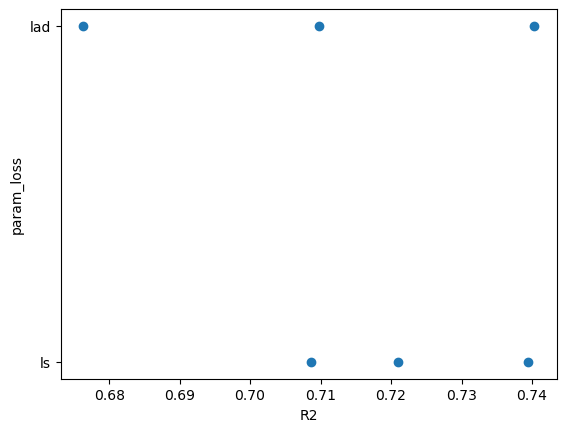

In [101]:

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import kernel_ridge, neighbors, svm 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scoring = {
    'r2' : 'r2'
}

model_params = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'elastic_net' : {
        'model' : ElasticNet(),
        'params' : {
            'alpha' : [0.001, 0.01, 0.1, 1., 10],
            'l1_ratio' : np.linspace(0.1,1,5),
        } 
    }, 
    'SVR' : {
        'model' : svm.SVR(kernel='rbf'),
        'params' : {
            'C' : [0.1, 1, 3, 5, 10],
            'gamma' : [0.1, 0.5, 1.0]
        }
    }, 

    'knn_regressor' : {
        'model' : neighbors.KNeighborsRegressor(),
        'params' : {
            'n_neighbors' : [i for i in range(2,15)]
        }
    },
        'random_forest' : {
        'model' : RandomForestRegressor(oob_score=True),
        'params' : {
            'n_estimators' : [50,100,1000],
            'min_samples_split' : [10, 20, 50, 100]
        }
    },
    'gradient_boost' : {
        'model' : GradientBoostingRegressor(),
        'params' : {
            'loss' : ['ls', 'lad'],
            'n_estimators' : [50,100,1000]
        } 
    } 
}

scores = []
essai = {}

for model_name, mp in model_params.items():
    clf = model_selection.GridSearchCV(mp['model'], mp['params'], cv=5, scoring=scoring, refit='r2')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    essai[model_name] = clf.cv_results_
    scores.append({
        'model' : model_name,
        'r2' : clf.best_score_,
        'best_params' : clf.best_params_,
        'RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'medAE' : metrics.median_absolute_error(y_test, y_pred),
        'MAE_%' : metrics.mean_absolute_percentage_error(y_test, y_pred),
        'time' : clf.refit_time_,
    })

resultats_synthese = pd.DataFrame(scores, columns=['model', 'r2', 'best_params', 'RMSE', 'medAE', 'MAE_%','time'])
resultat_detail = pd.DataFrame()

for i in essai.keys():
    if resultat_detail.shape[0] == 0 :
        resultat_detail = pd.DataFrame(essai[i])
        resultat_detail['name'] = i    
    else:
        temp = pd.DataFrame(essai[i])
        temp['name'] = i
        resultat_detail = resultat_detail.append(temp)

dfi = resultat_detail.copy()

for c in dfi.columns:
    try:
        dfi[c] = dfi[c].astype('float')
    except:
        dfi[c] = dfi[c]

for i in resultat_detail.name.unique():
    temp = dfi[dfi.name == i]
    temp = temp.dropna(axis=1)
    for c in temp.columns:
        if 'param_' in c:               
            if temp[c].dtypes != 'object':
                print(i)
                print(c)
                temp2 = temp.groupby(c, group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
                plt.plot(temp2.mean_test_r2, temp2[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                print('Meilleur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.show()
            else:
                print(i)
                print(c)
                print('Meileur valeur',temp2[temp2.mean_test_r2 == temp2.mean_test_r2.max()][c].values)
                plt.scatter(temp.mean_test_r2, temp[c])
                plt.xlabel('R2')
                plt.ylabel(c)
                plt.show()

In [102]:
resultats_synthese

,model,r2,best_params,RMSE,medAE,MAE_%,time
0,linear_regression,-2.833430e+22,{},0.601585,0.261053,0.160439,0.001000
1,elastic_net,7.292924e-01,"{'alpha': 0.001, 'l1_ratio': 0.55}",0.600585,0.261873,0.161203,0.006999
2,SVR,7.157322e-01,"{'C': 3, 'gamma': 0.1}",0.585775,0.258321,0.154722,0.060650
3,knn_regressor,6.233018e-01,{'n_neighbors': 9},0.719892,0.411522,0.209074,0.000000
4,random_forest,6.756258e-01,"{'min_samples_split': 10, 'n_estimators': 100}",0.638404,0.338116,0.172356,0.335997
5,gradient_boost,7.403091e-01,"{'loss': 'lad', 'n_estimators': 1000}",0.574274,0.257432,0.147583,2.643967


In [103]:
liste = ['name', 'mean_test_r2', 'mean_score_time']
for c in dfi.columns:
    if 'param_' in c:
        liste.append(c)
dfi = dfi.loc[:,liste]
dfc = dfi.groupby('name', group_keys=False).apply(lambda x: x.loc[x.mean_test_r2.idxmax()])
dfc

,name,mean_test_r2,mean_score_time,param_alpha,param_l1_ratio,param_C,param_gamma,param_n_neighbors,param_min_samples_split,param_n_estimators,param_loss
name,,,,,,,,,,,
SVR,SVR,7.157322e-01,0.012799,NaN,NaN,3.0,0.1,NaN,NaN,NaN,NaN
elastic_net,elastic_net,7.292924e-01,0.000800,0.001,0.55,NaN,NaN,NaN,NaN,NaN,NaN
gradient_boost,gradient_boost,7.403091e-01,0.002200,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,lad
knn_regressor,knn_regressor,6.233018e-01,0.004000,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
linear_regression,linear_regression,-2.833430e+22,0.000400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
random_forest,random_forest,6.756258e-01,0.010071,NaN,NaN,NaN,NaN,NaN,10.0,100.0,NaN


In [104]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_c = pd.DataFrame(lr.coef_, index=[i for i in dfx.columns], columns=['linear_regression'])

en = ElasticNet(alpha=dfc[dfc.index == 'elastic_net']['param_alpha'][0], l1_ratio=dfc[dfc.index == 'elastic_net']['param_l1_ratio'][0])
en.fit(X_train, y_train)
en_c = pd.DataFrame(en.coef_, index=[i for i in dfx.columns], columns=['elastic_net'])

svr = svm.SVR(C=dfc[dfc.index == 'SVR']['param_C'][0], gamma=dfc[dfc.index == 'SVR']['param_gamma'][0], kernel='linear')
svr.fit(X_train, y_train)
svr_c = pd.DataFrame(svr.coef_, columns=[i for i in dfx.columns], index=['support_vector']).T

rf = RandomForestRegressor(min_samples_split=dfc[dfc.index == 'random_forest']['param_min_samples_split'][0].astype('int'), n_estimators=dfc[dfc.index == 'random_forest']['param_n_estimators'][0].astype('int'))
rf.fit(X_train, y_train)
rf_c = pd.DataFrame(rf.feature_importances_, index=[i for i in dfx.columns], columns=['random_forest'])

# pas de coef dispo
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X_train, y_train)

xb = GradientBoostingRegressor(n_estimators=dfc[dfc.index == 'gradient_boost']['param_n_estimators'][0].astype('int'), loss=dfc[dfc.index == 'gradient_boost']['param_loss'][0])
xb.fit(X_train, y_train)
xb_c = pd.DataFrame(xb.feature_importances_, index=[i for i in dfx.columns], columns=['gradient_boost'])

coefs = pd.concat([lr_c, en_c, svr_c, rf_c, xb_c ], axis=1)

from sklearn.preprocessing import MinMaxScaler

normalise = MinMaxScaler()
X_scaled = normalise.fit_transform(coefs)
coefs_n = pd.DataFrame(X_scaled, columns = coefs.columns, index=coefs.index)

coefs_n['total'] = coefs_n.sum(axis=1)

In [105]:
coefs_n

,linear_regression,elastic_net,support_vector,random_forest,gradient_boost,total
Hotel,1.000000e+00,0.302343,0.270222,0.016254,0.037739,1.626557
Other,1.000000e+00,0.591926,0.540434,0.000022,0.000000,2.132383
Mixed Use Property,1.000000e+00,0.591926,0.543380,0.001408,0.006869,2.143584
K-12 School,1.000000e+00,0.458147,0.428790,0.001675,0.035012,1.923623
University,1.000000e+00,0.943285,0.987355,0.003929,0.079450,3.014019
Small- and Mid-Sized Office,1.000000e+00,0.675073,0.614812,0.009540,0.003420,2.302845
Self-Storage Facility,1.000000e+00,0.629191,0.587335,0.001019,0.010294,2.227838
Large Office,1.000000e+00,0.644688,0.610110,0.011206,0.011751,2.277755
Senior Care Community,1.000000e+00,0.591926,0.540434,0.000000,0.000000,2.132361
Medical Office,1.000000e+00,0.703623,0.634324,0.054137,0.038854,2.430937


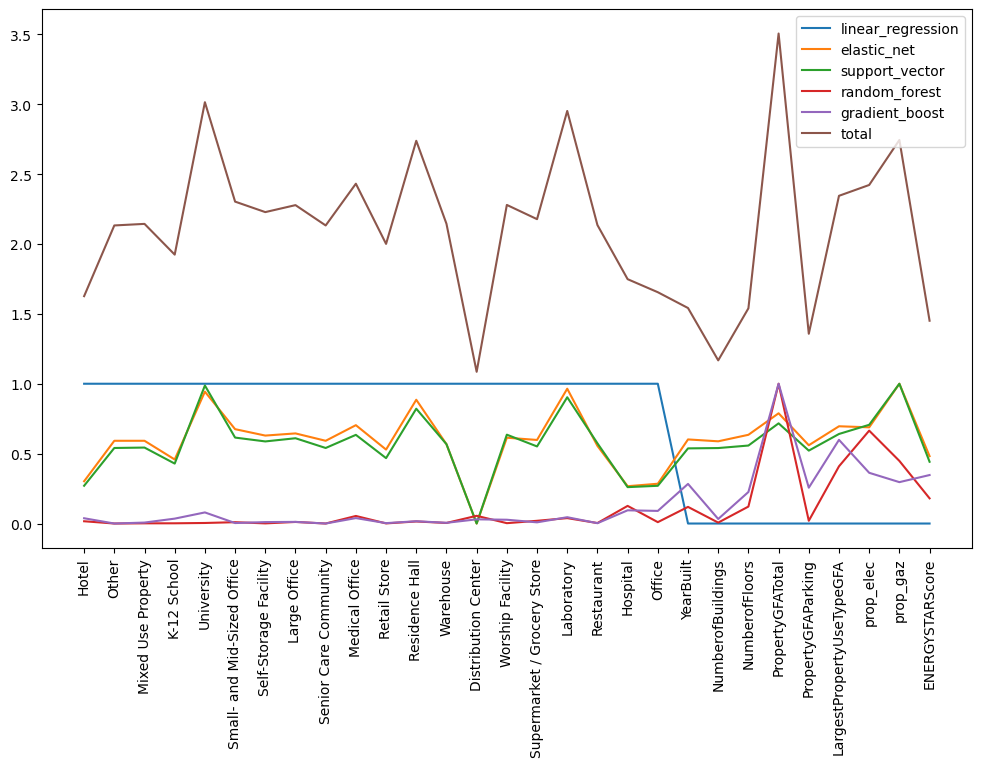

In [106]:
plt.figure(figsize=(12,7))
for c in coefs_n.columns:
    plt.plot(coefs_n.index, coefs_n[c], label=c)
    #plt.yscale('log')
    plt.legend()
    plt.xticks(rotation=90)
plt.show()

##### [sommaire](#S)

##### fin de page <a class='anchor' id='f'></a>